In [1]:
%matplotlib inline

In [2]:
import os

In [3]:
%run notebook_setup

# Load data in from Google Drive

from google.colab import drive
drive.mount('/content/drive')

# Transit fitting

*exoplanet* includes methods for computing the light curves transiting planets.
In its simplest form this can be used to evaluate a light curve like you would do with [batman](https://astro.uchicago.edu/~kreidberg/batman/), for example:

In [4]:
import os
HOME = os.environ['HOME']
os.chdir(f'{HOME}/Research/Planets/WASP43/github_analysis')

In [5]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import pandas as pd

import exoplanet as xo

from arctor import Arctor, info_message

In [6]:
def instantiate_arctor(planet_name, data_dir, working_dir, file_type):
    planet = Arctor(
        planet_name=planet_name,
        data_dir=data_dir,
        working_dir=working_dir,
        file_type=file_type)

    joblib_filename = f'{planet_name}_savedict.joblib.save'
    joblib_filename = f'{working_dir}/{joblib_filename}'
    if os.path.exists(joblib_filename):
        info_message('Loading Data from Save File')
        planet.load_data(joblib_filename)
    else:
        info_message('Loading New Data Object')
        planet.load_data()

    return planet

def create_raw_lc_stddev(planet):
    ppm = 1e6
    phot_vals = planet.photometry_df
    lc_std_rev = phot_vals.iloc[planet.idx_rev].std(axis=0)
    lc_std_fwd = phot_vals.iloc[planet.idx_fwd].std(axis=0)

    lc_med_rev = np.median(phot_vals.iloc[planet.idx_rev], axis=0)
    lc_med_fwd = np.median(phot_vals.iloc[planet.idx_rev], axis=0)

    lc_std = np.mean([lc_std_rev, lc_std_fwd], axis=0)
    lc_med = np.mean([lc_med_rev, lc_med_fwd], axis=0)

    return lc_std / lc_med * ppm

In [7]:
plot_verbose = False
save_now = False
planet_name = 'WASP43'
file_type = 'flt.fits'

HOME = os.environ['HOME']
base_dir = os.path.join(HOME, 'Research', 'Planets', 'WASP43')
data_dir = os.path.join(base_dir, 'data', 'UVIS', 'MAST_2019-07-03T0738')
data_dir = os.path.join(data_dir, 'HST', 'FLTs')
working_dir = os.path.join(base_dir, 'github_analysis', 'savefiles')

In [8]:
planet = instantiate_arctor(planet_name, data_dir, working_dir, file_type)

 15%|█▍        | 11/75 [00:00<00:00, 107.95it/s]

[INFO] Initializing Instance of the `HSTUVISTimeSeries` Object
[INFO] Loading New Data Object
[INFO] Loading Fits Files


 17%|█▋        | 13/75 [00:00<00:00, 123.40it/s]

[INFO] Creating New Flux/Error/Time Attributes


100%|██████████| 75/75 [00:00<00:00, 157.81it/s]


[INFO] Found 75 flt.fits files


In [9]:
planet.clean_cosmic_rays()
planet.calibration_trace_location()
planet.identify_trace_direction()
planet.simple_phots()
planet.center_all_traces()
planet.fit_trace_slopes()
planet.compute_sky_background(subpixels=32)
planet.compute_columnwise_sky_background()

  0%|          | 3/951 [00:00<00:31, 29.73it/s]

[INFO] Flagging Cosmic Rays using `Temporal Simple` Technique


100%|██████████| 951/951 [00:30<00:00, 31.23it/s]


[INFO] Cosmic Ray Mask Creation Took 30.456321239471436 seconds
[INFO] Calibration the Median Trace Location


100%|██████████| 75/75 [00:00<00:00, 392.93it/s]

[INFO] Cubic Spline Interpolating the Median Trace Location
[INFO] Calibration the Per Image Trace Location
[INFO] Identifying Trace Direction per Image



  0%|          | 0/75 [00:00<?, ?it/s]

[INFO] Computing the Center of the Trace
[INFO] Starting Multiprocess for Image 0


  1%|▏         | 1/75 [00:01<01:22,  1.12s/it]

[INFO] Center computing Image 0 took 1.12 seconds
[INFO] Starting Multiprocess for Image 1


  3%|▎         | 2/75 [00:02<01:19,  1.09s/it]

[INFO] Center computing Image 1 took 1.03 seconds
[INFO] Starting Multiprocess for Image 2


  4%|▍         | 3/75 [00:03<01:17,  1.08s/it]

[INFO] Center computing Image 2 took 1.05 seconds
[INFO] Starting Multiprocess for Image 3


  5%|▌         | 4/75 [00:04<01:18,  1.11s/it]

[INFO] Center computing Image 3 took 1.16 seconds
[INFO] Starting Multiprocess for Image 4


  7%|▋         | 5/75 [00:05<01:22,  1.17s/it]

[INFO] Center computing Image 4 took 1.33 seconds
[INFO] Starting Multiprocess for Image 5


  8%|▊         | 6/75 [00:06<01:18,  1.13s/it]

[INFO] Center computing Image 5 took 1.04 seconds
[INFO] Starting Multiprocess for Image 6


  9%|▉         | 7/75 [00:07<01:15,  1.10s/it]

[INFO] Center computing Image 6 took 1.03 seconds
[INFO] Starting Multiprocess for Image 7


 11%|█         | 8/75 [00:08<01:14,  1.11s/it]

[INFO] Center computing Image 7 took 1.13 seconds
[INFO] Starting Multiprocess for Image 8


 12%|█▏        | 9/75 [00:10<01:13,  1.11s/it]

[INFO] Center computing Image 8 took 1.12 seconds
[INFO] Starting Multiprocess for Image 9


 13%|█▎        | 10/75 [00:11<01:13,  1.13s/it]

[INFO] Center computing Image 9 took 1.15 seconds
[INFO] Starting Multiprocess for Image 10


 15%|█▍        | 11/75 [00:12<01:14,  1.16s/it]

[INFO] Center computing Image 10 took 1.25 seconds
[INFO] Starting Multiprocess for Image 11


 16%|█▌        | 12/75 [00:13<01:11,  1.13s/it]

[INFO] Center computing Image 11 took 1.04 seconds
[INFO] Starting Multiprocess for Image 12


 17%|█▋        | 13/75 [00:14<01:10,  1.13s/it]

[INFO] Center computing Image 12 took 1.15 seconds
[INFO] Starting Multiprocess for Image 13


 19%|█▊        | 14/75 [00:15<01:09,  1.14s/it]

[INFO] Center computing Image 13 took 1.16 seconds
[INFO] Starting Multiprocess for Image 14


 20%|██        | 15/75 [00:16<01:08,  1.14s/it]

[INFO] Center computing Image 14 took 1.14 seconds
[INFO] Starting Multiprocess for Image 15


 21%|██▏       | 16/75 [00:18<01:07,  1.15s/it]

[INFO] Center computing Image 15 took 1.16 seconds
[INFO] Starting Multiprocess for Image 16


 23%|██▎       | 17/75 [00:19<01:08,  1.18s/it]

[INFO] Center computing Image 16 took 1.24 seconds
[INFO] Starting Multiprocess for Image 17


 24%|██▍       | 18/75 [00:20<01:06,  1.17s/it]

[INFO] Center computing Image 17 took 1.14 seconds
[INFO] Starting Multiprocess for Image 18


 25%|██▌       | 19/75 [00:21<01:03,  1.13s/it]

[INFO] Center computing Image 18 took 1.06 seconds
[INFO] Starting Multiprocess for Image 19


 27%|██▋       | 20/75 [00:22<01:01,  1.11s/it]

[INFO] Center computing Image 19 took 1.06 seconds
[INFO] Starting Multiprocess for Image 20


 28%|██▊       | 21/75 [00:23<01:00,  1.13s/it]

[INFO] Center computing Image 20 took 1.16 seconds
[INFO] Starting Multiprocess for Image 21


 29%|██▉       | 22/75 [00:24<01:00,  1.14s/it]

[INFO] Center computing Image 21 took 1.16 seconds
[INFO] Starting Multiprocess for Image 22


 31%|███       | 23/75 [00:26<00:59,  1.15s/it]

[INFO] Center computing Image 22 took 1.17 seconds
[INFO] Starting Multiprocess for Image 23


 32%|███▏      | 24/75 [00:27<00:58,  1.15s/it]

[INFO] Center computing Image 23 took 1.17 seconds
[INFO] Starting Multiprocess for Image 24


 33%|███▎      | 25/75 [00:28<00:59,  1.19s/it]

[INFO] Center computing Image 24 took 1.28 seconds
[INFO] Starting Multiprocess for Image 25


 35%|███▍      | 26/75 [00:29<00:56,  1.16s/it]

[INFO] Center computing Image 25 took 1.07 seconds
[INFO] Starting Multiprocess for Image 26


 36%|███▌      | 27/75 [00:30<00:55,  1.16s/it]

[INFO] Center computing Image 26 took 1.16 seconds
[INFO] Starting Multiprocess for Image 27


 37%|███▋      | 28/75 [00:31<00:54,  1.16s/it]

[INFO] Center computing Image 27 took 1.17 seconds
[INFO] Starting Multiprocess for Image 28


 39%|███▊      | 29/75 [00:33<00:53,  1.16s/it]

[INFO] Center computing Image 28 took 1.17 seconds
[INFO] Starting Multiprocess for Image 29


 40%|████      | 30/75 [00:34<00:52,  1.17s/it]

[INFO] Center computing Image 29 took 1.17 seconds
[INFO] Starting Multiprocess for Image 30


 41%|████▏     | 31/75 [00:35<00:51,  1.17s/it]

[INFO] Center computing Image 30 took 1.17 seconds
[INFO] Starting Multiprocess for Image 31


 43%|████▎     | 32/75 [00:36<00:50,  1.17s/it]

[INFO] Center computing Image 31 took 1.16 seconds
[INFO] Starting Multiprocess for Image 32


 44%|████▍     | 33/75 [00:37<00:48,  1.16s/it]

[INFO] Center computing Image 32 took 1.16 seconds
[INFO] Starting Multiprocess for Image 33


 45%|████▌     | 34/75 [00:39<00:50,  1.23s/it]

[INFO] Center computing Image 33 took 1.39 seconds
[INFO] Starting Multiprocess for Image 34


 47%|████▋     | 35/75 [00:40<00:48,  1.21s/it]

[INFO] Center computing Image 34 took 1.15 seconds
[INFO] Starting Multiprocess for Image 35


 48%|████▊     | 36/75 [00:41<00:46,  1.20s/it]

[INFO] Center computing Image 35 took 1.18 seconds
[INFO] Starting Multiprocess for Image 36


 49%|████▉     | 37/75 [00:42<00:45,  1.19s/it]

[INFO] Center computing Image 36 took 1.18 seconds
[INFO] Starting Multiprocess for Image 37


 51%|█████     | 38/75 [00:43<00:44,  1.19s/it]

[INFO] Center computing Image 37 took 1.18 seconds
[INFO] Starting Multiprocess for Image 38


 52%|█████▏    | 39/75 [00:45<00:42,  1.19s/it]

[INFO] Center computing Image 38 took 1.17 seconds
[INFO] Starting Multiprocess for Image 39


 53%|█████▎    | 40/75 [00:46<00:40,  1.15s/it]

[INFO] Center computing Image 39 took 1.07 seconds
[INFO] Starting Multiprocess for Image 40


 55%|█████▍    | 41/75 [00:47<00:38,  1.13s/it]

[INFO] Center computing Image 40 took 1.08 seconds
[INFO] Starting Multiprocess for Image 41


 56%|█████▌    | 42/75 [00:48<00:37,  1.15s/it]

[INFO] Center computing Image 41 took 1.20 seconds
[INFO] Starting Multiprocess for Image 42


 57%|█████▋    | 43/75 [00:49<00:37,  1.16s/it]

[INFO] Center computing Image 42 took 1.18 seconds
[INFO] Starting Multiprocess for Image 43


 59%|█████▊    | 44/75 [00:50<00:36,  1.17s/it]

[INFO] Center computing Image 43 took 1.19 seconds
[INFO] Starting Multiprocess for Image 44


 60%|██████    | 45/75 [00:51<00:35,  1.18s/it]

[INFO] Center computing Image 44 took 1.19 seconds
[INFO] Starting Multiprocess for Image 45


 61%|██████▏   | 46/75 [00:53<00:36,  1.24s/it]

[INFO] Center computing Image 45 took 1.39 seconds
[INFO] Starting Multiprocess for Image 46


 63%|██████▎   | 47/75 [00:54<00:33,  1.19s/it]

[INFO] Center computing Image 46 took 1.08 seconds
[INFO] Starting Multiprocess for Image 47


 64%|██████▍   | 48/75 [00:55<00:32,  1.19s/it]

[INFO] Center computing Image 47 took 1.18 seconds
[INFO] Starting Multiprocess for Image 48


 65%|██████▌   | 49/75 [00:56<00:30,  1.16s/it]

[INFO] Center computing Image 48 took 1.09 seconds
[INFO] Starting Multiprocess for Image 49


 67%|██████▋   | 50/75 [00:57<00:29,  1.17s/it]

[INFO] Center computing Image 49 took 1.20 seconds
[INFO] Starting Multiprocess for Image 50


 68%|██████▊   | 51/75 [00:59<00:28,  1.17s/it]

[INFO] Center computing Image 50 took 1.18 seconds
[INFO] Starting Multiprocess for Image 51


 69%|██████▉   | 52/75 [01:00<00:27,  1.18s/it]

[INFO] Center computing Image 51 took 1.19 seconds
[INFO] Starting Multiprocess for Image 52


 71%|███████   | 53/75 [01:01<00:26,  1.19s/it]

[INFO] Center computing Image 52 took 1.21 seconds
[INFO] Starting Multiprocess for Image 53


 72%|███████▏  | 54/75 [01:02<00:25,  1.20s/it]

[INFO] Center computing Image 53 took 1.21 seconds
[INFO] Starting Multiprocess for Image 54


 73%|███████▎  | 55/75 [01:03<00:23,  1.16s/it]

[INFO] Center computing Image 54 took 1.06 seconds
[INFO] Starting Multiprocess for Image 55


 75%|███████▍  | 56/75 [01:04<00:21,  1.14s/it]

[INFO] Center computing Image 55 took 1.09 seconds
[INFO] Starting Multiprocess for Image 56


 76%|███████▌  | 57/75 [01:06<00:20,  1.16s/it]

[INFO] Center computing Image 56 took 1.20 seconds
[INFO] Starting Multiprocess for Image 57


 77%|███████▋  | 58/75 [01:07<00:19,  1.18s/it]

[INFO] Center computing Image 57 took 1.22 seconds
[INFO] Starting Multiprocess for Image 58


 79%|███████▊  | 59/75 [01:08<00:18,  1.15s/it]

[INFO] Center computing Image 58 took 1.10 seconds
[INFO] Starting Multiprocess for Image 59


 80%|████████  | 60/75 [01:09<00:18,  1.25s/it]

[INFO] Center computing Image 59 took 1.47 seconds
[INFO] Starting Multiprocess for Image 60


 81%|████████▏ | 61/75 [01:11<00:17,  1.24s/it]

[INFO] Center computing Image 60 took 1.21 seconds
[INFO] Starting Multiprocess for Image 61


 83%|████████▎ | 62/75 [01:12<00:15,  1.23s/it]

[INFO] Center computing Image 61 took 1.20 seconds
[INFO] Starting Multiprocess for Image 62


 84%|████████▍ | 63/75 [01:13<00:14,  1.22s/it]

[INFO] Center computing Image 62 took 1.20 seconds
[INFO] Starting Multiprocess for Image 63


 85%|████████▌ | 64/75 [01:14<00:13,  1.22s/it]

[INFO] Center computing Image 63 took 1.21 seconds
[INFO] Starting Multiprocess for Image 64


 87%|████████▋ | 65/75 [01:15<00:12,  1.21s/it]

[INFO] Center computing Image 64 took 1.20 seconds
[INFO] Starting Multiprocess for Image 65


 88%|████████▊ | 66/75 [01:17<00:10,  1.21s/it]

[INFO] Center computing Image 65 took 1.21 seconds
[INFO] Starting Multiprocess for Image 66


 89%|████████▉ | 67/75 [01:18<00:09,  1.18s/it]

[INFO] Center computing Image 66 took 1.10 seconds
[INFO] Starting Multiprocess for Image 67


 91%|█████████ | 68/75 [01:19<00:08,  1.19s/it]

[INFO] Center computing Image 67 took 1.21 seconds
[INFO] Starting Multiprocess for Image 68


 92%|█████████▏| 69/75 [01:20<00:07,  1.20s/it]

[INFO] Center computing Image 68 took 1.22 seconds
[INFO] Starting Multiprocess for Image 69


 93%|█████████▎| 70/75 [01:21<00:06,  1.21s/it]

[INFO] Center computing Image 69 took 1.22 seconds
[INFO] Starting Multiprocess for Image 70


 95%|█████████▍| 71/75 [01:23<00:04,  1.21s/it]

[INFO] Center computing Image 70 took 1.22 seconds
[INFO] Starting Multiprocess for Image 71


 96%|█████████▌| 72/75 [01:24<00:03,  1.22s/it]

[INFO] Center computing Image 71 took 1.23 seconds
[INFO] Starting Multiprocess for Image 72


 97%|█████████▋| 73/75 [01:25<00:02,  1.21s/it]

[INFO] Center computing Image 72 took 1.21 seconds
[INFO] Starting Multiprocess for Image 73


 99%|█████████▊| 74/75 [01:26<00:01,  1.22s/it]

[INFO] Center computing Image 73 took 1.21 seconds
[INFO] Starting Multiprocess for Image 74


100%|██████████| 75/75 [01:27<00:00,  1.17s/it]

[INFO] Center computing Image 74 took 1.21 seconds
[INFO] Fitting a slope to the Center of the Trace



100%|██████████| 75/75 [00:01<00:00, 42.96it/s]


# Run Multi-Phot

In [10]:
# Set up the list of aperture widths and heights to search
min_aper_width = 1
max_aper_width = 100
min_aper_height = 1
max_aper_height = 100

aper_widths = np.arange(min_aper_width, max_aper_width + 2, 5)
aper_heights = np.arange(min_aper_height, max_aper_height + 2, 5)

In [11]:
planet.do_multi_phot(aper_widths, aper_heights)

 35%|███▍      | 26/75 [00:00<00:00, 124.29it/s]

[INFO] Beginning Multi-Aperture Photometry
[INFO] Creating Apertures


100%|██████████| 75/75 [00:00<00:00, 78.83it/s]


[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image
[INFO] Aperture Photometry per Image took 260.93210768699646 seconds for 33075 apertures.
[INFO] Restructuring Aperture Photometry into DataFrames


In [ ]:
from arctor.plotting import plot

# Determine the 'best' photometry SNR

In [12]:
planet_coarse_photometry_df = planet.photometry_df.copy()

In [13]:
coarse_snr_lightcurves = create_raw_lc_stddev(planet)
coarse_min_snr = coarse_snr_lightcurves[coarse_snr_lightcurves.argmin()]
coarse_min_snr_colname = planet.photometry_df.columns[coarse_snr_lightcurves.argmin()]
coarse_min_snr_col = planet.normed_photometry_df[coarse_min_snr_colname]
coarse_temp = coarse_min_snr_colname.split('_')[-1].split('x')
coarse_min_snr_aper_width, coarse_min_snr_aper_height = np.int32(coarse_temp)

In [14]:
info_message(f'Coarse Aperture Photometry Resulted in {coarse_min_snr:0.0f}ppm with '
             f'{coarse_min_snr_aper_width}x{coarse_min_snr_aper_height} aperture size')

[INFO] Coarse Aperture Photometry Resulted in 209ppm with 16x51 aperture size


In [15]:
fine_buffer = 10
fine_aper_widths = np.arange(coarse_min_snr_aper_width - fine_buffer,
                             coarse_min_snr_aper_width + fine_buffer)

fine_aper_heights = np.arange(coarse_min_snr_aper_height - fine_buffer,
                              coarse_min_snr_aper_height + fine_buffer)

In [16]:
del planet.photometry_df

In [17]:
planet.do_multi_phot(fine_aper_widths, fine_aper_heights)

 36%|███▌      | 27/75 [00:00<00:00, 131.88it/s]

[INFO] Beginning Multi-Aperture Photometry
[INFO] Creating Apertures


100%|██████████| 75/75 [00:00<00:00, 134.03it/s]


[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image
[INFO] Aperture Photometry per Image took 219.10326433181763 seconds for 30000 apertures.
[INFO] Restructuring Aperture Photometry into DataFrames


In [18]:
planet_fine_photometry_df = planet.photometry_df.copy()

In [19]:
fine_snr_lightcurves = create_raw_lc_stddev(planet)
fine_min_snr = fine_snr_lightcurves[fine_snr_lightcurves.argmin()]
fine_min_snr_colname = planet.photometry_df.columns[fine_snr_lightcurves.argmin()]
fine_min_snr_flux = planet.normed_photometry_df[fine_min_snr_colname]
fine_min_snr_uncs = planet.normed_uncertainty_df[fine_min_snr_colname]
fine_temp = fine_min_snr_colname.split('_')[-1].split('x')
fine_min_snr_aper_width, fine_min_snr_aper_height = np.int32(fine_temp)

In [20]:
info_message(f'Fine Aperture Photometry Resulted in {fine_min_snr:0.0f}ppm with '
             f'{fine_min_snr_aper_width}x{fine_min_snr_aper_height} aperture size; '
             f'with median uncertainties of {np.median(fine_min_snr_uncs)*1e6:0.0f} ppm')

[INFO] Fine Aperture Photometry Resulted in 208ppm with 17x50 aperture size; with median uncertainties of 126 ppm


# Configure system for PyMC3

In [21]:
data_df = pd.DataFrame()
data_df['flux'] = fine_min_snr_flux.values
data_df['unc'] = fine_min_snr_uncs.values
data_df['times'] = planet.times
idx_fwd = planet.idx_fwd
idx_rev = planet.idx_rev
# data_df.sort_values('times', inplace=True)
# data_df = data_df.reset_index()
# data_df.drop(['index'], axis=1, inplace=True)
data_df.sample(10)

,flux,unc,times
14,1.000637,0.000126,58667.086769
74,0.999911,0.000126,58667.154558
59,1.000252,0.000126,58667.159316
20,0.999860,0.000126,58667.235033
1,1.000180,0.000126,58667.102626
49,1.000204,0.000126,58667.231862
30,1.000043,0.000126,58667.012475
66,0.999582,0.000126,58667.223934
31,0.999943,0.000126,58667.216005
69,1.000429,0.000126,58667.168829


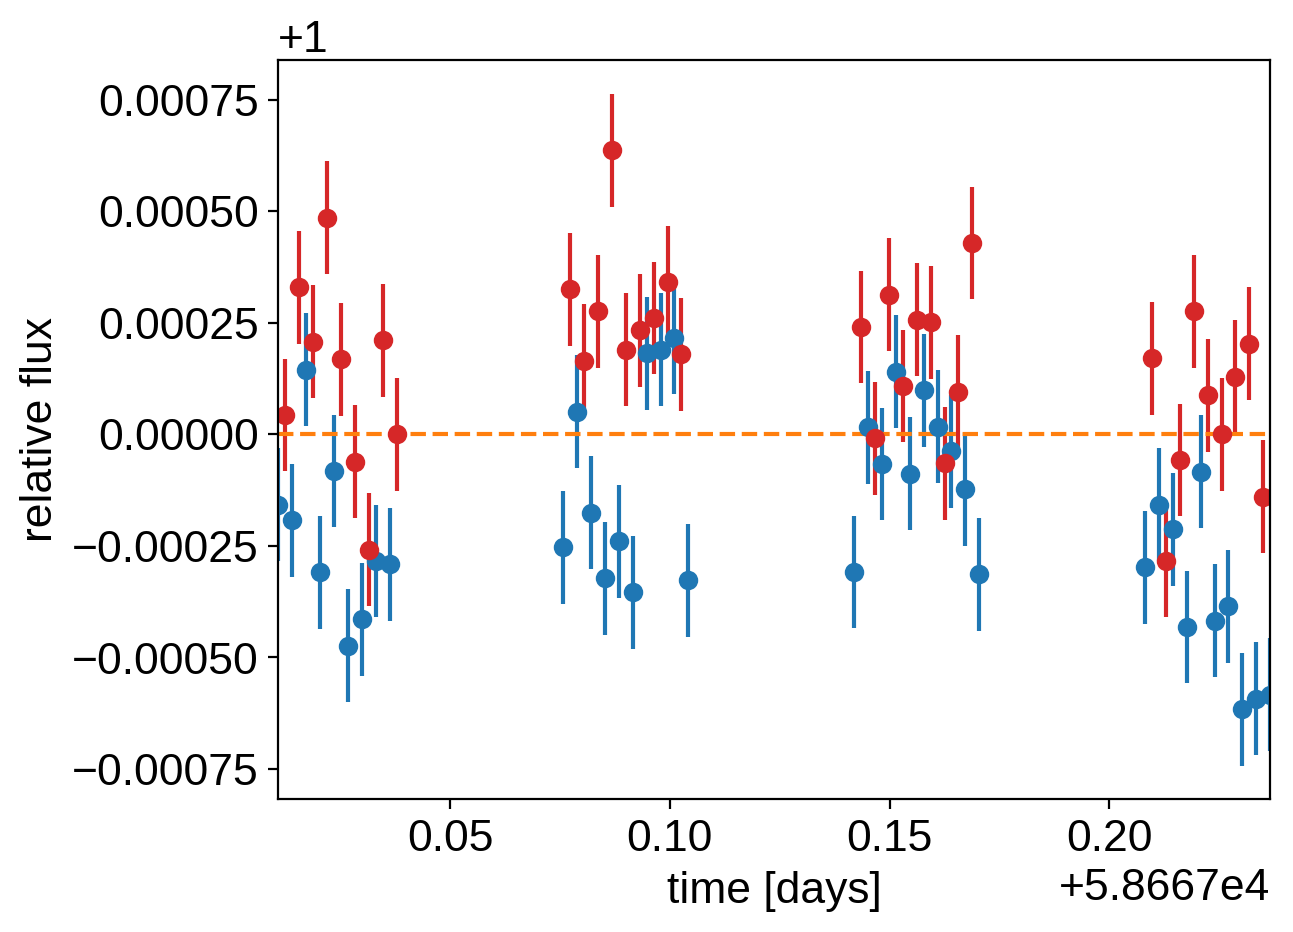

In [22]:
# Compute a limb-darkened light curve using starry
t = data_df['times']
u = []
flux = data_df['flux']
yerr = data_df['unc']
# Note: the `eval` is needed because this is using Theano in
# the background

plt.errorbar(t[idx_fwd], flux[idx_fwd], yerr[idx_fwd], fmt='o', color="C0")
plt.errorbar(t[idx_rev], flux[idx_rev], yerr[idx_rev], fmt='o', color="C3")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

But the real power comes from the fact that this is defined as a [Theano operation](http://deeplearning.net/software/theano/extending/extending_theano.html) so it can be combined with PyMC3 to do transit inference using Hamiltonian Monte Carlo.

## The transit model in PyMC3

In this section, we will construct a simple transit fit model using *PyMC3* and then we will fit a two planet model to simulated data.
To start, let's randomly sample some periods and phases and then define the time sampling:

In [23]:
np.random.seed(42)

time_med = np.median(t)
med_t_diff = np.median(np.diff(t))

Then, define the parameters.
In this simple model, we'll just fit for the limb darkening parameters of the star, and the period, phase, impact parameter, and radius ratio of the planets (note: this is already 10 parameters and running MCMC to convergence using [emcee](https://emcee.readthedocs.io) would probably take at least an hour).
For the limb darkening, we'll use a quadratic law as parameterized by [Kipping (2013)](https://arxiv.org/abs/1308.0009).
This reparameterizations is implemented in *exoplanet* as custom *PyMC3* distribution :class:`exoplanet.distributions.QuadLimbDark`.

In [24]:
print(f'This instance has {mp.cpu_count()} CPUs')

This instance has 16 CPUs


In [25]:
import pymc3 as pm
b = 0.66 # Hellier 2011
period = 0.813475  # days # exo.mast.stsci.edu
u = [0]
t0 = time_med
edepth = np.sqrt(1000/1e6)

orbit = xo.orbits.KeplerianOrbit(period=period, t0=t0, b=b)
injected_light_curves = xo.LimbDarkLightCurve(u).get_light_curve(orbit=orbit, r=edepth, t=t).eval().flatten()

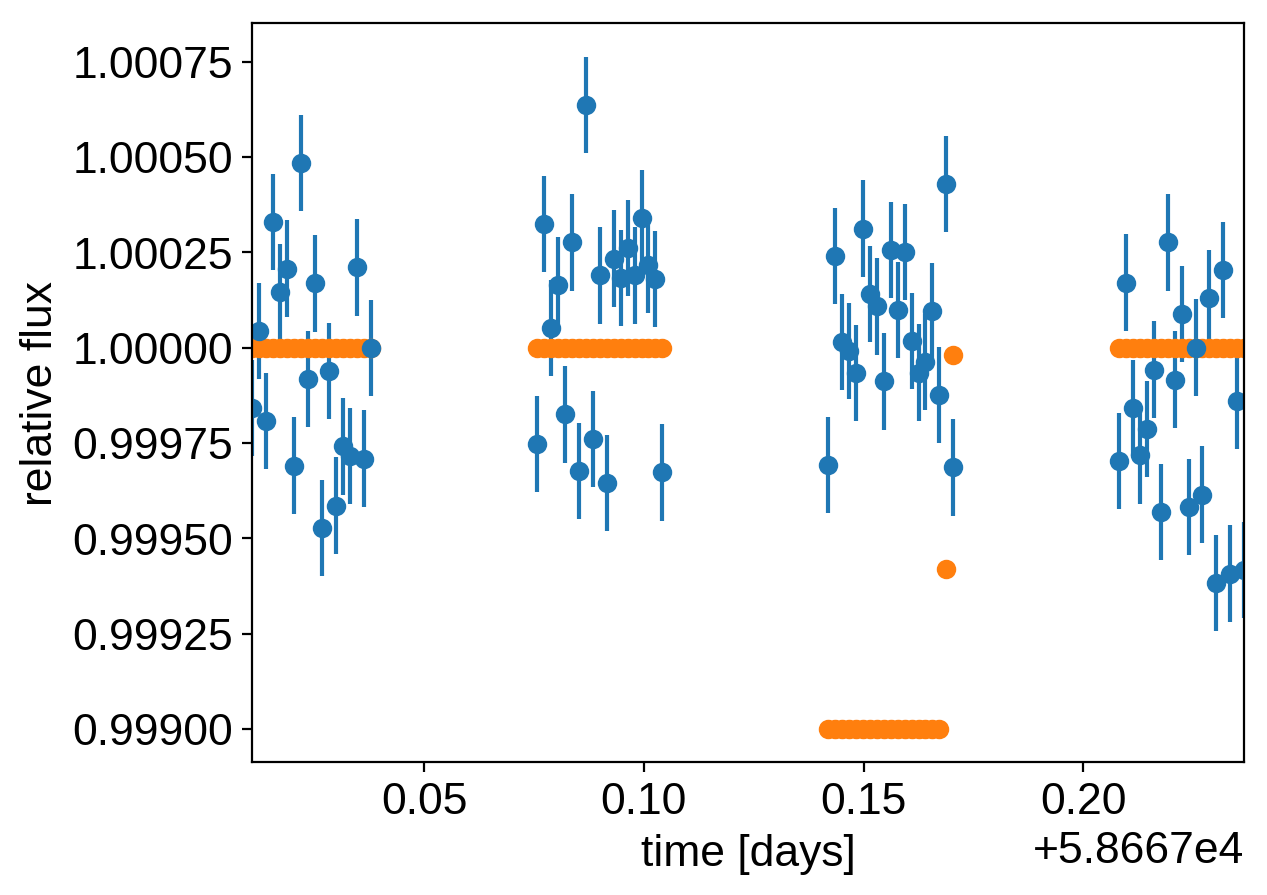

In [26]:
plt.errorbar(t, flux, yerr, fmt='o')
plt.plot(t, injected_light_curves+1,'o')
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

In [27]:
t0_wasp43 = 55528.3684  # exo.mast.stsci.edu
n_epochs = np.int(np.round(((time_med - t0_wasp43) / period)-0.5))
n_epochs, ((time_med - t0_wasp43) / period)
t0_guess = t0_wasp43 + (n_epochs+0.5) * period

# t0s = np.random.normal(t0_guess, 0.1*med_t_diff, size=2)
t0s = t0_guess

In [28]:
import pymc3 as pm
b = 0.66 # Hellier 2011
period = 0.813475  # days # exo.mast.stsci.edu
u = [0]

# oot_guess = np.median(np.r_[flux[:2*18], flux[-18:]])
# stellar_variance = np.std(np.r_[flux[:2*18], flux[-18:]])
data = flux * (injected_light_curves+1)# - oot_guess
t0 = t0_guess

def run_pymc3(t, data, yerr, idx_fwd, idx_rev, t0, u, period, b, xcenters=None):
    with pm.Model() as model:

        # The baseline flux
        mean_fwd = pm.Normal("mean_fwd", mu=1.0, sd=1.0)
        mean_rev = pm.Normal("mean_rev", mu=1.0, sd=1.0)

        # The time of a reference transit for each planet
        # t0 = pm.Normal("t0", mu=t0_guess, sd=1e-6)  # , shape=2)

        # The log period; also tracking the period itself
        # logP = pm.Normal("logP", mu=np.log(periods), sd=0.1, shape=2)
        # period = pm.Deterministic("period", pm.math.exp(logP))

        # The Kipping (2013) parameterization for quadratic limb darkening paramters
        # u = xo.distributions.QuadLimbDark("u", testval=np.array([0.3, 0.2]))

        edepth = pm.Uniform("edepth", lower=1e-6, upper=0.1)  # , shape=2)  #, testval=np.array([0.04, 0.06]))
        edepth = np.sqrt(edepth)
        # b = xo.distributions.ImpactParameter("b", ror=r, shape=2, testval=np.random.rand(2))

        slope = pm.Uniform("slope", lower=-0.1, upper=0.1)
        # intercept = pm.Uniform("intercept", lower=-0.1, upper=0.1)
        line_fwd = slope * (t[idx_fwd]-t0_guess) + mean_fwd
        line_rev = slope * (t[idx_rev]-t0_guess) + mean_rev

        # Set up a Keplerian orbit for the planets
        orbit = xo.orbits.KeplerianOrbit(period=period, t0=t0s, b=b)

        # # Compute the model light curve using starry
        light_curves_fwd = xo.LimbDarkLightCurve(u).get_light_curve(orbit=orbit, r=edepth, t=t[idx_fwd])
        light_curves_rev = xo.LimbDarkLightCurve(u).get_light_curve(orbit=orbit, r=edepth, t=t[idx_rev])
        light_curve_fwd = pm.math.sum(light_curves_fwd, axis=-1) 
        light_curve_rev = pm.math.sum(light_curves_rev, axis=-1) 

        # # Here we track the value of the model light curve for plotting
        # # purposes
        pm.Deterministic("light_curves_fwd", light_curves_fwd)
        pm.Deterministic("light_curves_rev", light_curves_rev)

        # # In this line, we simulate the dataset that we will fit
        # # y = xo.eval_in_model(light_curve)
        # # y += yerr * np.random.randn(len(y))

        # # The likelihood function assuming known Gaussian uncertainty
        pm.Normal("obs_fwd", mu=light_curve_fwd + line_fwd, sd=yerr[idx_fwd], observed=data[idx_fwd])
        pm.Normal("obs_rev", mu=light_curve_rev + line_rev, sd=yerr[idx_rev], observed=data[idx_rev])

        # # Fit for the maximum a posteriori parameters given the simuated dataset
        map_soln = xo.optimize(start=model.test_point)

        np.random.seed(42)

        trace = pm.sample(
            tune=3000,
            draws=3000,
            start=map_soln,
            chains=mp.cpu_count(),
            step=xo.get_dense_nuts_step(target_accept=0.9),
            cores=mp.cpu_count()
        )
    
    return trace, map_soln

In [29]:
import joblib
from tqdm import tqdm

In [ ]:
print(f"Found an eclipse of size {map_soln['edepth']*1e6:.0f} ppm at {map_soln['edepth']*86400:.2f} seconds from expected")

In [ ]:
plt.errorbar(t[idx_fwd], data[idx_fwd], yerr[idx_fwd], color="C0", fmt='o', ms=4, label="Forward Scan")
plt.errorbar(t[idx_rev], data[idx_rev], yerr[idx_rev], color="C3", fmt='o', ms=4, label="Reverse Scan")
plt.plot(t[idx_fwd], map_soln["light_curves_fwd"] + map_soln['mean_fwd'], lw=1, color='C1', label='FwdModel')
plt.plot(t[idx_rev], map_soln["light_curves_rev"] + map_soln['mean_rev'], lw=1, color='C2', label='RevModel')
plt.axhline(1.0, ls='--', color='orange')
plt.xlim(t.min(), t.max())
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.legend(fontsize=10)
plt.title("map model");

# Run 400 MCMCs

In [31]:
fine_min_snr_flux = planet.normed_photometry_df
fine_min_snr_uncs = planet.normed_uncertainty_df

n_columns = len(fine_min_snr_flux.columns)

aper_sum_columns = planet.normed_photometry_df.drop(
    ['xcenter', 'ycenter'], axis=1).columns

fine_grain_mcmcs_w_xcenterfit = {}
for colname in tqdm(aper_sum_columns):
    # info_message(f'Working on {colname} for Trace MCMCs')
    data = fine_min_snr_flux[colname]
    yerr = fine_min_snr_uncs[colname]

    trace, map_soln = run_pymc3(t, data, yerr, idx_fwd, idx_rev, t0, u, period, b)
    fine_grain_mcmcs_w_xcenterfit[colname] = {}
    fine_grain_mcmcs_w_xcenterfit[colname]['trace'] = trace
    fine_grain_mcmcs_w_xcenterfit[colname]['map_soln'] = map_soln
    info_message(f'Completed {colname} for Trace MCMCs')

filename = 'WASP43_fine_grain_photometry_100x100_208ppm_100mcmcs_with_xcenterfit.joblib.save'
info_message(f'Saving MCMCs to {filename}')
joblib.dump(fine_grain_mcmcs_w_xcenterfit, filename)

[INFO] Working on aperture_sum_6x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
152it [00:00, 206.84it/s, logp=4.937454e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1442632.6574364149 -> 493.74544263442044
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1673.49draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_6x41 for Trace MCMCs
[INFO] Working on aperture_sum_7x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.49it/s, logp=4.926439e+02] 
message: Optimization terminated successfully.
logp: -1442384.616196399 -> 492.6438648814126
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1679.71draws/s]


[INFO] Completed aperture_sum_7x41 for Trace MCMCs
[INFO] Working on aperture_sum_8x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.80it/s, logp=4.926914e+02] 
message: Optimization terminated successfully.
logp: -1442645.926020159 -> 492.69136892962604
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:55<00:00, 1718.86draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x41 for Trace MCMCs
[INFO] Working on aperture_sum_9x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
123it [00:00, 176.35it/s, logp=4.922953e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1442618.9540850134 -> 492.2953312023799
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:54<00:00, 1761.48draws/s]


[INFO] Completed aperture_sum_9x41 for Trace MCMCs
[INFO] Working on aperture_sum_10x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
120it [00:00, 189.85it/s, logp=4.923548e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1442808.9512229846 -> 492.35475714248827
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:56<00:00, 1705.31draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x41 for Trace MCMCs
[INFO] Working on aperture_sum_11x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 94.12it/s, logp=4.923157e+02] 
message: Optimization terminated successfully.
logp: -1442860.1656482278 -> 492.3157347928513
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:55<00:00, 1731.41draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x41 for Trace MCMCs
[INFO] Working on aperture_sum_12x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.58it/s, logp=4.924003e+02] 
message: Optimization terminated successfully.
logp: -1443014.928614366 -> 492.4002967943078
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:55<00:00, 1732.77draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x41 for Trace MCMCs
[INFO] Working on aperture_sum_13x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
140it [00:00, 212.99it/s, logp=4.923877e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1443040.5464282273 -> 492.3876710765612
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:55<00:00, 1725.74draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x41 for Trace MCMCs
[INFO] Working on aperture_sum_14x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.30it/s, logp=4.924974e+02] 
message: Optimization terminated successfully.
logp: -1443056.5024567933 -> 492.49736479126557
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:56<00:00, 1687.27draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x41 for Trace MCMCs
[INFO] Working on aperture_sum_15x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.83it/s, logp=4.923764e+02] 
message: Optimization terminated successfully.
logp: -1443054.5031002425 -> 492.37636283169536
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:55<00:00, 1715.11draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_15x41 for Trace MCMCs
[INFO] Working on aperture_sum_16x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
119it [00:00, 162.84it/s, logp=4.923397e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1443107.2698900423 -> 492.3397382784459
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:56<00:00, 1690.46draws/s]


[INFO] Completed aperture_sum_16x41 for Trace MCMCs
[INFO] Working on aperture_sum_17x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
149it [00:00, 195.31it/s, logp=4.922212e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1443107.3091253303 -> 492.22115973981096
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1654.15draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x41 for Trace MCMCs
[INFO] Working on aperture_sum_18x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 94.57it/s, logp=4.921505e+02] 
message: Optimization terminated successfully.
logp: -1443194.1164940847 -> 492.1505026087018
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:56<00:00, 1711.54draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_18x41 for Trace MCMCs
[INFO] Working on aperture_sum_19x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
133it [00:00, 183.19it/s, logp=4.920409e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1443239.7959014005 -> 492.0409392044646
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1639.88draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x41 for Trace MCMCs
[INFO] Working on aperture_sum_20x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
133it [00:00, 176.88it/s, logp=4.921068e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1443318.8841057038 -> 492.1067786895621
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1673.88draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_20x41 for Trace MCMCs
[INFO] Working on aperture_sum_21x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.82it/s, logp=4.920164e+02] 
message: Optimization terminated successfully.
logp: -1443351.45070141 -> 492.0163781249056
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1649.53draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x41 for Trace MCMCs
[INFO] Working on aperture_sum_22x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
142it [00:00, 208.25it/s, logp=4.919306e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1443393.0358221154 -> 491.9305973606369
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:56<00:00, 1694.93draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_22x41 for Trace MCMCs
[INFO] Working on aperture_sum_23x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.92it/s, logp=4.919164e+02] 
message: Optimization terminated successfully.
logp: -1443399.1972096912 -> 491.9163992040757
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1665.74draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x41 for Trace MCMCs
[INFO] Working on aperture_sum_24x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
122it [00:00, 176.40it/s, logp=4.920375e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1443477.0781647828 -> 492.0374970146431
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:55<00:00, 1732.78draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_24x41 for Trace MCMCs
[INFO] Working on aperture_sum_25x41 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
52it [00:00, 99.19it/s, logp=4.919958e+02] 
message: Optimization terminated successfully.
logp: -1443599.6720981058 -> 491.99583821569036
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1637.03draws/s]


[INFO] Completed aperture_sum_25x41 for Trace MCMCs
[INFO] Working on aperture_sum_6x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.26it/s, logp=4.944579e+02] 
message: Optimization terminated successfully.
logp: -1443670.6784967734 -> 494.45786006893593
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1624.96draws/s]


[INFO] Completed aperture_sum_6x42 for Trace MCMCs
[INFO] Working on aperture_sum_7x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.95it/s, logp=4.933678e+02] 
message: Optimization terminated successfully.
logp: -1443422.5771439592 -> 493.3678381921507
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:55<00:00, 1726.90draws/s]


[INFO] Completed aperture_sum_7x42 for Trace MCMCs
[INFO] Working on aperture_sum_8x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.16it/s, logp=4.934135e+02] 
message: Optimization terminated successfully.
logp: -1443682.7886641799 -> 493.41349492110953
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1673.52draws/s]


[INFO] Completed aperture_sum_8x42 for Trace MCMCs
[INFO] Working on aperture_sum_9x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
121it [00:00, 177.07it/s, logp=4.930125e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1443655.8750486588 -> 493.0125306453799
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1629.90draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x42 for Trace MCMCs
[INFO] Working on aperture_sum_10x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
88it [00:00, 141.21it/s, logp=4.930636e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1443846.0412424598 -> 493.0635720777717
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1617.49draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x42 for Trace MCMCs
[INFO] Working on aperture_sum_11x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
137it [00:00, 184.14it/s, logp=4.930235e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1443901.426871662 -> 493.02350212253793
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1651.69draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x42 for Trace MCMCs
[INFO] Working on aperture_sum_12x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.04it/s, logp=4.931011e+02] 
message: Optimization terminated successfully.
logp: -1444058.196466085 -> 493.10111319865257
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1630.05draws/s]


[INFO] Completed aperture_sum_12x42 for Trace MCMCs
[INFO] Working on aperture_sum_13x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.38it/s, logp=4.930833e+02] 
message: Optimization terminated successfully.
logp: -1444082.5607098197 -> 493.08332928350046
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1673.15draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x42 for Trace MCMCs
[INFO] Working on aperture_sum_14x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 99.18it/s, logp=4.931902e+02] 
message: Optimization terminated successfully.
logp: -1444097.3785151106 -> 493.19018999846935
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1665.88draws/s]


[INFO] Completed aperture_sum_14x42 for Trace MCMCs
[INFO] Working on aperture_sum_15x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
118it [00:00, 168.53it/s, logp=4.930731e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1444093.2645447212 -> 493.0730575788793
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1635.63draws/s]


[INFO] Completed aperture_sum_15x42 for Trace MCMCs
[INFO] Working on aperture_sum_16x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.14it/s, logp=4.930312e+02] 
message: Optimization terminated successfully.
logp: -1444145.4673975157 -> 493.0312456767172
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1649.20draws/s]


[INFO] Completed aperture_sum_16x42 for Trace MCMCs
[INFO] Working on aperture_sum_17x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
163it [00:00, 205.42it/s, logp=4.929026e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1444143.4193632812 -> 492.9025797764192
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1654.39draws/s]


[INFO] Completed aperture_sum_17x42 for Trace MCMCs
[INFO] Working on aperture_sum_18x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
148it [00:00, 188.32it/s, logp=4.928271e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1444222.7324958406 -> 492.8270938432448
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1607.06draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_18x42 for Trace MCMCs
[INFO] Working on aperture_sum_19x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
147it [00:00, 192.67it/s, logp=4.927191e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1444267.182227503 -> 492.71913847280393
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:56<00:00, 1692.23draws/s]


[INFO] Completed aperture_sum_19x42 for Trace MCMCs
[INFO] Working on aperture_sum_20x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:08,  5.24it/s, logp=4.927834e+02] 
message: Optimization terminated successfully.
logp: -1444349.7219427594 -> 492.7834079233713
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1651.26draws/s]


[INFO] Completed aperture_sum_20x42 for Trace MCMCs
[INFO] Working on aperture_sum_21x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.47it/s, logp=4.926895e+02] 
message: Optimization terminated successfully.
logp: -1444372.1048911728 -> 492.6894850680551
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1644.44draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x42 for Trace MCMCs
[INFO] Working on aperture_sum_22x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 94.07it/s, logp=4.926093e+02] 
message: Optimization terminated successfully.
logp: -1444421.8020765563 -> 492.6092985967897
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:56<00:00, 1694.42draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_22x42 for Trace MCMCs
[INFO] Working on aperture_sum_23x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 95.54it/s, logp=4.926072e+02] 
message: Optimization terminated successfully.
logp: -1444439.525519038 -> 492.6071696360972
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1665.84draws/s]


[INFO] Completed aperture_sum_23x42 for Trace MCMCs
[INFO] Working on aperture_sum_24x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
124it [00:00, 173.88it/s, logp=4.927364e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1444521.3798945136 -> 492.73636182419835
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1639.62draws/s]


[INFO] Completed aperture_sum_24x42 for Trace MCMCs
[INFO] Working on aperture_sum_25x42 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
121it [00:00, 170.48it/s, logp=4.926975e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1444642.9501277588 -> 492.69752004647125
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1654.56draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x42 for Trace MCMCs
[INFO] Working on aperture_sum_6x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.39it/s, logp=4.951941e+02] 
message: Optimization terminated successfully.
logp: -1444620.8194172326 -> 495.19411995520926
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1631.94draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_6x43 for Trace MCMCs
[INFO] Working on aperture_sum_7x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
144it [00:00, 196.07it/s, logp=4.941221e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1444375.2496795787 -> 494.1221182500269
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:56<00:00, 1693.59draws/s]


[INFO] Completed aperture_sum_7x43 for Trace MCMCs
[INFO] Working on aperture_sum_8x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
141it [00:00, 180.17it/s, logp=4.941721e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1444638.4565369668 -> 494.172082136788
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1644.29draws/s]


[INFO] Completed aperture_sum_8x43 for Trace MCMCs
[INFO] Working on aperture_sum_9x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
127it [00:00, 172.13it/s, logp=4.937750e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1444612.9777467288 -> 493.77500299640667
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:56<00:00, 1711.80draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x43 for Trace MCMCs
[INFO] Working on aperture_sum_10x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.45it/s, logp=4.938262e+02] 
message: Optimization terminated successfully.
logp: -1444798.111571427 -> 493.82622592535427
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1585.20draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x43 for Trace MCMCs
[INFO] Working on aperture_sum_11x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
52it [00:00, 102.41it/s, logp=4.937900e+02]
message: Optimization terminated successfully.
logp: -1444851.4090516716 -> 493.7900304930083
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1647.36draws/s]


[INFO] Completed aperture_sum_11x43 for Trace MCMCs
[INFO] Working on aperture_sum_12x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.74it/s, logp=4.938625e+02] 
message: Optimization terminated successfully.
logp: -1445007.2888560607 -> 493.86251350977784
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1667.09draws/s]


[INFO] Completed aperture_sum_12x43 for Trace MCMCs
[INFO] Working on aperture_sum_13x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
52it [00:00, 102.94it/s, logp=4.938451e+02]
message: Optimization terminated successfully.
logp: -1445027.1784079273 -> 493.84512370873824
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:56<00:00, 1685.08draws/s]


[INFO] Completed aperture_sum_13x43 for Trace MCMCs
[INFO] Working on aperture_sum_14x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
132it [00:00, 177.37it/s, logp=4.939511e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1445039.5122262652 -> 493.9511228421314
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1658.57draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x43 for Trace MCMCs
[INFO] Working on aperture_sum_15x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.50it/s, logp=4.938281e+02] 
message: Optimization terminated successfully.
logp: -1445031.9497930903 -> 493.8280902137784
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1622.96draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_15x43 for Trace MCMCs
[INFO] Working on aperture_sum_16x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
128it [00:00, 194.78it/s, logp=4.937788e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1445079.9207475083 -> 493.7788166033795
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1626.73draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x43 for Trace MCMCs
[INFO] Working on aperture_sum_17x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
124it [00:00, 173.43it/s, logp=4.936378e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1445077.3781075482 -> 493.6378423946842
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1572.43draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x43 for Trace MCMCs
[INFO] Working on aperture_sum_18x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.00it/s, logp=4.935485e+02] 
message: Optimization terminated successfully.
logp: -1445157.6614846783 -> 493.54853667993024
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1597.06draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_18x43 for Trace MCMCs
[INFO] Working on aperture_sum_19x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.92it/s, logp=4.934307e+02] 
message: Optimization terminated successfully.
logp: -1445202.7837615763 -> 493.43069460719346
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1605.92draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x43 for Trace MCMCs
[INFO] Working on aperture_sum_20x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 94.32it/s, logp=4.934843e+02] 
message: Optimization terminated successfully.
logp: -1445290.6252283282 -> 493.48432837887697
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1603.93draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_20x43 for Trace MCMCs
[INFO] Working on aperture_sum_21x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.87it/s, logp=4.933884e+02] 
message: Optimization terminated successfully.
logp: -1445319.4989400925 -> 493.3884312164127
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1624.47draws/s]


[INFO] Completed aperture_sum_21x43 for Trace MCMCs
[INFO] Working on aperture_sum_22x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
120it [00:00, 221.55it/s, logp=4.933126e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1445372.8823770906 -> 493.31261699912204
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1599.69draws/s]


[INFO] Completed aperture_sum_22x43 for Trace MCMCs
[INFO] Working on aperture_sum_23x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 94.41it/s, logp=4.933115e+02] 
message: Optimization terminated successfully.
logp: -1445396.656890957 -> 493.31154971138164
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1578.32draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x43 for Trace MCMCs
[INFO] Working on aperture_sum_24x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.99it/s, logp=4.934432e+02] 
message: Optimization terminated successfully.
logp: -1445483.346022488 -> 493.44324529894516
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1629.68draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_24x43 for Trace MCMCs
[INFO] Working on aperture_sum_25x43 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.54it/s, logp=4.934130e+02] 
message: Optimization terminated successfully.
logp: -1445604.9959174087 -> 493.4129971781671
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1632.63draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x43 for Trace MCMCs
[INFO] Working on aperture_sum_6x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
130it [00:00, 178.62it/s, logp=4.958056e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1445636.454579797 -> 495.80560111411864
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1666.41draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_6x44 for Trace MCMCs
[INFO] Working on aperture_sum_7x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
76it [00:00, 132.08it/s, logp=4.947425e+02]
message: Optimization terminated successfully.
logp: -1445395.273851411 -> 494.7424786211802
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1610.90draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x44 for Trace MCMCs
[INFO] Working on aperture_sum_8x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.23it/s, logp=4.947987e+02] 
message: Optimization terminated successfully.
logp: -1445662.0847836863 -> 494.7986869662204
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1616.69draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x44 for Trace MCMCs
[INFO] Working on aperture_sum_9x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.59it/s, logp=4.944056e+02] 
message: Optimization terminated successfully.
logp: -1445637.1560547766 -> 494.40564856910817
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:58<00:00, 1642.15draws/s]


[INFO] Completed aperture_sum_9x44 for Trace MCMCs
[INFO] Working on aperture_sum_10x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
168it [00:00, 208.15it/s, logp=4.944561e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1445818.1575216083 -> 494.45606014393184
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1608.53draws/s]


[INFO] Completed aperture_sum_10x44 for Trace MCMCs
[INFO] Working on aperture_sum_11x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 108.34it/s, logp=4.944186e+02]
message: Optimization terminated successfully.
logp: -1445869.3180373064 -> 494.4185539614447
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1594.91draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x44 for Trace MCMCs
[INFO] Working on aperture_sum_12x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
135it [00:00, 182.67it/s, logp=4.944863e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446022.6825150037 -> 494.486291413964
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1579.87draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x44 for Trace MCMCs
[INFO] Working on aperture_sum_13x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
49it [00:00, 93.45it/s, logp=4.944685e+02] 
message: Optimization terminated successfully.
logp: -1446037.232880294 -> 494.4684978381621
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1583.15draws/s]


[INFO] Completed aperture_sum_13x44 for Trace MCMCs
[INFO] Working on aperture_sum_14x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
132it [00:00, 214.05it/s, logp=4.945752e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446047.639317921 -> 494.5751990308615
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1609.59draws/s]


[INFO] Completed aperture_sum_14x44 for Trace MCMCs
[INFO] Working on aperture_sum_15x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
131it [00:00, 175.36it/s, logp=4.944644e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446037.070993649 -> 494.4643951049456
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1668.63draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_15x44 for Trace MCMCs
[INFO] Working on aperture_sum_16x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.88it/s, logp=4.944426e+02] 
message: Optimization terminated successfully.
logp: -1446081.1794997402 -> 494.4426120080053
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1660.78draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x44 for Trace MCMCs
[INFO] Working on aperture_sum_17x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
169it [00:00, 210.85it/s, logp=4.943145e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446079.801297172 -> 494.31445641070684
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1619.98draws/s]


[INFO] Completed aperture_sum_17x44 for Trace MCMCs
[INFO] Working on aperture_sum_18x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 95.31it/s, logp=4.942230e+02] 
message: Optimization terminated successfully.
logp: -1446162.216931372 -> 494.2230158216204
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:57<00:00, 1660.95draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_18x44 for Trace MCMCs
[INFO] Working on aperture_sum_19x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.75it/s, logp=4.940993e+02] 
message: Optimization terminated successfully.
logp: -1446205.7290669167 -> 494.0992634182205
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1577.71draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x44 for Trace MCMCs
[INFO] Working on aperture_sum_20x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
220it [00:00, 232.49it/s, logp=4.941415e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446297.0719118305 -> 494.14153943428596
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1606.65draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_20x44 for Trace MCMCs
[INFO] Working on aperture_sum_21x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
132it [00:00, 184.47it/s, logp=4.940413e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446330.8783348033 -> 494.041271246639
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1614.02draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x44 for Trace MCMCs
[INFO] Working on aperture_sum_22x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
201it [00:00, 221.30it/s, logp=4.939671e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446385.3224617294 -> 493.9671030889783
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1522.37draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_22x44 for Trace MCMCs
[INFO] Working on aperture_sum_23x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.56it/s, logp=4.939624e+02] 
message: Optimization terminated successfully.
logp: -1446415.327604692 -> 493.96242953068696
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1533.30draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x44 for Trace MCMCs
[INFO] Working on aperture_sum_24x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
134it [00:00, 179.12it/s, logp=4.940931e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446507.5780932256 -> 494.09310263476124
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1593.41draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_24x44 for Trace MCMCs
[INFO] Working on aperture_sum_25x44 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
134it [00:00, 182.40it/s, logp=4.940706e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446631.1858747946 -> 494.0705642607578
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1622.79draws/s]


[INFO] Completed aperture_sum_25x44 for Trace MCMCs
[INFO] Working on aperture_sum_6x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
50it [00:00, 97.92it/s, logp=4.963550e+02] 
message: Optimization terminated successfully.
logp: -1446571.0084066335 -> 496.35500540382225
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1617.17draws/s]


[INFO] Completed aperture_sum_6x45 for Trace MCMCs
[INFO] Working on aperture_sum_7x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.96it/s, logp=4.953076e+02] 
message: Optimization terminated successfully.
logp: -1446332.887565283 -> 495.30763202149296
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1568.44draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x45 for Trace MCMCs
[INFO] Working on aperture_sum_8x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.56it/s, logp=4.953728e+02] 
message: Optimization terminated successfully.
logp: -1446597.994784873 -> 495.3727553040013
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1605.71draws/s]


[INFO] Completed aperture_sum_8x45 for Trace MCMCs
[INFO] Working on aperture_sum_9x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
199it [00:00, 228.17it/s, logp=4.949919e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446570.841901699 -> 494.9918725903251
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1566.30draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x45 for Trace MCMCs
[INFO] Working on aperture_sum_10x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
141it [00:00, 212.35it/s, logp=4.950482e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446750.7132955974 -> 495.0482131719868
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1593.22draws/s]


[INFO] Completed aperture_sum_10x45 for Trace MCMCs
[INFO] Working on aperture_sum_11x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.23it/s, logp=4.950201e+02] 
message: Optimization terminated successfully.
logp: -1446758.4063541368 -> 495.0201351929277
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1604.11draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x45 for Trace MCMCs
[INFO] Working on aperture_sum_12x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 98.04it/s, logp=4.950941e+02] 
message: Optimization terminated successfully.
logp: -1446842.4958558707 -> 495.09411144800674
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1580.59draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x45 for Trace MCMCs
[INFO] Working on aperture_sum_13x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.25it/s, logp=4.950804e+02] 
message: Optimization terminated successfully.
logp: -1446836.0887414685 -> 495.0804359177074
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1567.90draws/s]


[INFO] Completed aperture_sum_13x45 for Trace MCMCs
[INFO] Working on aperture_sum_14x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.50it/s, logp=4.951875e+02] 
message: Optimization terminated successfully.
logp: -1446954.6303638485 -> 495.1874743782132
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1545.81draws/s]


[INFO] Completed aperture_sum_14x45 for Trace MCMCs
[INFO] Working on aperture_sum_15x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
150it [00:00, 224.36it/s, logp=4.951198e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1446962.4899834048 -> 495.1198004064604
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1559.90draws/s]


[INFO] Completed aperture_sum_15x45 for Trace MCMCs
[INFO] Working on aperture_sum_16x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
135it [00:00, 181.79it/s, logp=4.951837e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447004.2894298711 -> 495.18371342314657
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1597.41draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x45 for Trace MCMCs
[INFO] Working on aperture_sum_17x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
142it [00:00, 184.77it/s, logp=4.951125e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447000.432119995 -> 495.1124573078154
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1622.21draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x45 for Trace MCMCs
[INFO] Working on aperture_sum_18x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 97.57it/s, logp=4.950449e+02] 
message: Optimization terminated successfully.
logp: -1447083.6147360671 -> 495.04490540310996
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [00:59<00:00, 1603.91draws/s]


[INFO] Completed aperture_sum_18x45 for Trace MCMCs
[INFO] Working on aperture_sum_19x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.50it/s, logp=4.949306e+02] 
message: Optimization terminated successfully.
logp: -1447127.847690722 -> 494.93061058504304
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1569.56draws/s]


[INFO] Completed aperture_sum_19x45 for Trace MCMCs
[INFO] Working on aperture_sum_20x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
142it [00:00, 186.87it/s, logp=4.949685e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447223.8434641825 -> 494.9684564007433
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1558.93draws/s]


[INFO] Completed aperture_sum_20x45 for Trace MCMCs
[INFO] Working on aperture_sum_21x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.98it/s, logp=4.948636e+02] 
message: Optimization terminated successfully.
logp: -1447264.3633949782 -> 494.86363734803285
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1581.68draws/s]


[INFO] Completed aperture_sum_21x45 for Trace MCMCs
[INFO] Working on aperture_sum_22x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
138it [00:00, 183.05it/s, logp=4.947880e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447319.992891861 -> 494.7880482966923
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1599.90draws/s]


[INFO] Completed aperture_sum_22x45 for Trace MCMCs
[INFO] Working on aperture_sum_23x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.43it/s, logp=4.947818e+02] 
message: Optimization terminated successfully.
logp: -1447350.7800281488 -> 494.7818233589319
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1563.90draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x45 for Trace MCMCs
[INFO] Working on aperture_sum_24x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
124it [00:00, 173.58it/s, logp=4.949097e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447443.63022093 -> 494.90969868079816
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1569.78draws/s]


[INFO] Completed aperture_sum_24x45 for Trace MCMCs
[INFO] Working on aperture_sum_25x45 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
128it [00:00, 183.11it/s, logp=4.948821e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447541.0098369075 -> 494.88209675839255
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1545.39draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x45 for Trace MCMCs
[INFO] Working on aperture_sum_6x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
129it [00:00, 177.61it/s, logp=4.964607e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447266.9110929589 -> 496.4607409615528
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1526.33draws/s]


[INFO] Completed aperture_sum_6x46 for Trace MCMCs
[INFO] Working on aperture_sum_7x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
142it [00:00, 183.64it/s, logp=4.954250e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447031.7370161903 -> 495.4249587625147
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1515.34draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x46 for Trace MCMCs
[INFO] Working on aperture_sum_8x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 94.32it/s, logp=4.955053e+02] 
message: Optimization terminated successfully.
logp: -1447295.675217147 -> 495.50525888975307
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1543.80draws/s]


[INFO] Completed aperture_sum_8x46 for Trace MCMCs
[INFO] Working on aperture_sum_9x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
100it [00:00, 165.94it/s, logp=4.951368e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447267.6885496518 -> 495.1368421165301
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1579.03draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x46 for Trace MCMCs
[INFO] Working on aperture_sum_10x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
148it [00:00, 198.72it/s, logp=4.952046e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447446.390943835 -> 495.2045646222973
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1583.01draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x46 for Trace MCMCs
[INFO] Working on aperture_sum_11x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.98it/s, logp=4.951907e+02] 
message: Optimization terminated successfully.
logp: -1447476.8566116206 -> 495.1906763635641
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1577.34draws/s]


[INFO] Completed aperture_sum_11x46 for Trace MCMCs
[INFO] Working on aperture_sum_12x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.67it/s, logp=4.952770e+02] 
message: Optimization terminated successfully.
logp: -1447563.6956772702 -> 495.2770433654031
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1575.71draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x46 for Trace MCMCs
[INFO] Working on aperture_sum_13x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
99it [00:00, 177.76it/s, logp=4.952677e+02]
message: Optimization terminated successfully.
logp: -1447557.057124679 -> 495.26766788885857
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1522.68draws/s]


[INFO] Completed aperture_sum_13x46 for Trace MCMCs
[INFO] Working on aperture_sum_14x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 107.16it/s, logp=4.953714e+02]
message: Optimization terminated successfully.
logp: -1447666.627935111 -> 495.371402478226
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1552.90draws/s]


[INFO] Completed aperture_sum_14x46 for Trace MCMCs
[INFO] Working on aperture_sum_15x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.91it/s, logp=4.953236e+02] 
message: Optimization terminated successfully.
logp: -1447653.4574161 -> 495.32358938188383
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1526.79draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_15x46 for Trace MCMCs
[INFO] Working on aperture_sum_16x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
211it [00:00, 232.11it/s, logp=4.954376e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447693.0876129395 -> 495.4376141622607
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1576.35draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x46 for Trace MCMCs
[INFO] Working on aperture_sum_17x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
138it [00:00, 183.39it/s, logp=4.953986e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447685.9238297793 -> 495.39858519604707
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1587.13draws/s]


[INFO] Completed aperture_sum_17x46 for Trace MCMCs
[INFO] Working on aperture_sum_18x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.14it/s, logp=4.953439e+02] 
message: Optimization terminated successfully.
logp: -1447770.1383433272 -> 495.34394269794734
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1544.10draws/s]


[INFO] Completed aperture_sum_18x46 for Trace MCMCs
[INFO] Working on aperture_sum_19x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.22it/s, logp=4.952295e+02] 
message: Optimization terminated successfully.
logp: -1447816.7322510288 -> 495.22953556041494
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1544.10draws/s]


[INFO] Completed aperture_sum_19x46 for Trace MCMCs
[INFO] Working on aperture_sum_20x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
126it [00:00, 176.34it/s, logp=4.952554e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447918.7742130978 -> 495.2553978398431
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1555.87draws/s]


[INFO] Completed aperture_sum_20x46 for Trace MCMCs
[INFO] Working on aperture_sum_21x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.25it/s, logp=4.951373e+02] 
message: Optimization terminated successfully.
logp: -1447967.8633402232 -> 495.13732916611684
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1559.40draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x46 for Trace MCMCs
[INFO] Working on aperture_sum_22x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.33it/s, logp=4.950548e+02] 
message: Optimization terminated successfully.
logp: -1448026.6221721405 -> 495.0548172616242
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1543.66draws/s]


[INFO] Completed aperture_sum_22x46 for Trace MCMCs
[INFO] Working on aperture_sum_23x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.91it/s, logp=4.950440e+02] 
message: Optimization terminated successfully.
logp: -1448055.0399712995 -> 495.04400938596876
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1579.81draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x46 for Trace MCMCs
[INFO] Working on aperture_sum_24x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 95.21it/s, logp=4.951710e+02] 
message: Optimization terminated successfully.
logp: -1448143.7021602707 -> 495.1709906158113
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1556.16draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_24x46 for Trace MCMCs
[INFO] Working on aperture_sum_25x46 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
53it [00:00, 100.98it/s, logp=4.951438e+02]
message: Optimization terminated successfully.
logp: -1448267.1497202166 -> 495.1437960637767
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1548.48draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x46 for Trace MCMCs
[INFO] Working on aperture_sum_6x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
111it [00:00, 171.35it/s, logp=4.965366e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1448034.7800061316 -> 496.53663421276497
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1492.02draws/s]


[INFO] Completed aperture_sum_6x47 for Trace MCMCs
[INFO] Working on aperture_sum_7x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
131it [00:00, 180.22it/s, logp=4.955209e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1447805.3282424612 -> 495.5209010004372
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1491.69draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x47 for Trace MCMCs
[INFO] Working on aperture_sum_8x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
238it [00:00, 249.70it/s, logp=4.956186e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1448071.7820071252 -> 495.618593907078
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1560.07draws/s]


[INFO] Completed aperture_sum_8x47 for Trace MCMCs
[INFO] Working on aperture_sum_9x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.39it/s, logp=4.952541e+02] 
message: Optimization terminated successfully.
logp: -1448043.0764655806 -> 495.2540624953915
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1518.14draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x47 for Trace MCMCs
[INFO] Working on aperture_sum_10x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 103.43it/s, logp=4.953357e+02]
message: Optimization terminated successfully.
logp: -1448219.590485538 -> 495.3357033364887
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1537.50draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x47 for Trace MCMCs
[INFO] Working on aperture_sum_11x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
96it [00:00, 151.30it/s, logp=4.953343e+02]
message: Optimization terminated successfully.
logp: -1448268.3578373725 -> 495.33427738460034
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1558.96draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x47 for Trace MCMCs
[INFO] Working on aperture_sum_12x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.54it/s, logp=4.954309e+02] 
message: Optimization terminated successfully.
logp: -1448416.9118245086 -> 495.43092726971156
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1542.20draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x47 for Trace MCMCs
[INFO] Working on aperture_sum_13x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
165it [00:00, 202.20it/s, logp=4.954254e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1448425.7322692797 -> 495.4253720782251
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1575.60draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x47 for Trace MCMCs
[INFO] Working on aperture_sum_14x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.48it/s, logp=4.955283e+02] 
message: Optimization terminated successfully.
logp: -1448433.3238698584 -> 495.5283012779865
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1568.83draws/s]


[INFO] Completed aperture_sum_14x47 for Trace MCMCs
[INFO] Working on aperture_sum_15x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.61it/s, logp=4.954725e+02] 
message: Optimization terminated successfully.
logp: -1448421.7443908353 -> 495.47246066355285
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1538.01draws/s]


[INFO] Completed aperture_sum_15x47 for Trace MCMCs
[INFO] Working on aperture_sum_16x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 88.36it/s, logp=4.955783e+02] 
message: Optimization terminated successfully.
logp: -1448460.9597104716 -> 495.5783076315113
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1523.51draws/s]


[INFO] Completed aperture_sum_16x47 for Trace MCMCs
[INFO] Working on aperture_sum_17x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.30it/s, logp=4.955271e+02] 
message: Optimization terminated successfully.
logp: -1448451.6087683633 -> 495.52711204823106
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1551.98draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x47 for Trace MCMCs
[INFO] Working on aperture_sum_18x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.97it/s, logp=4.954672e+02] 
message: Optimization terminated successfully.
logp: -1448536.2685607108 -> 495.4671995488453
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1550.73draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_18x47 for Trace MCMCs
[INFO] Working on aperture_sum_19x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.06it/s, logp=4.953419e+02] 
message: Optimization terminated successfully.
logp: -1448585.4903252665 -> 495.34185044172625
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1511.78draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x47 for Trace MCMCs
[INFO] Working on aperture_sum_20x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
49it [00:00, 96.01it/s, logp=4.953455e+02] 
message: Optimization terminated successfully.
logp: -1448692.4436112694 -> 495.34551828450043
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1523.51draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_20x47 for Trace MCMCs
[INFO] Working on aperture_sum_21x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.88it/s, logp=4.952055e+02] 
message: Optimization terminated successfully.
logp: -1448752.7918523143 -> 495.205497449597
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1525.82draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x47 for Trace MCMCs
[INFO] Working on aperture_sum_22x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
99it [00:00, 152.64it/s, logp=4.951080e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1448813.265874742 -> 495.10798054637434
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1517.02draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_22x47 for Trace MCMCs
[INFO] Working on aperture_sum_23x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.02it/s, logp=4.950900e+02] 
message: Optimization terminated successfully.
logp: -1448844.4469827197 -> 495.0900431352735
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1562.15draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x47 for Trace MCMCs
[INFO] Working on aperture_sum_24x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
144it [00:00, 193.36it/s, logp=4.952198e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1448929.8770348101 -> 495.2197593711413
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1501.74draws/s]


[INFO] Completed aperture_sum_24x47 for Trace MCMCs
[INFO] Working on aperture_sum_25x47 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
90it [00:00, 142.79it/s, logp=4.952011e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449052.3600400356 -> 495.20111155228534
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1537.10draws/s]


[INFO] Completed aperture_sum_25x47 for Trace MCMCs
[INFO] Working on aperture_sum_6x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
139it [00:00, 185.86it/s, logp=4.965017e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449083.5893824766 -> 496.50172764405886
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1528.64draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_6x48 for Trace MCMCs
[INFO] Working on aperture_sum_7x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
135it [00:00, 190.29it/s, logp=4.955094e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1448858.900060783 -> 495.5093764235422
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1533.56draws/s]


[INFO] Completed aperture_sum_7x48 for Trace MCMCs
[INFO] Working on aperture_sum_8x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
55it [00:00, 101.21it/s, logp=4.956196e+02]
message: Optimization terminated successfully.
logp: -1449127.1673585605 -> 495.6195679876103
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1477.35draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x48 for Trace MCMCs
[INFO] Working on aperture_sum_9x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
136it [00:00, 177.57it/s, logp=4.952569e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449095.4208265692 -> 495.25694240924327
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1549.28draws/s]


[INFO] Completed aperture_sum_9x48 for Trace MCMCs
[INFO] Working on aperture_sum_10x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
96it [00:00, 145.79it/s, logp=4.953510e+02]
message: Optimization terminated successfully.
logp: -1449268.3129112944 -> 495.35102803177426
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1520.07draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x48 for Trace MCMCs
[INFO] Working on aperture_sum_11x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
129it [00:00, 177.06it/s, logp=4.953589e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449238.6488836003 -> 495.35888802911086
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1559.30draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x48 for Trace MCMCs
[INFO] Working on aperture_sum_12x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
140it [00:00, 180.49it/s, logp=4.954603e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449325.2566264025 -> 495.4603193945568
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1515.38draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x48 for Trace MCMCs
[INFO] Working on aperture_sum_13x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.27it/s, logp=4.954601e+02] 
message: Optimization terminated successfully.
logp: -1449317.5543703465 -> 495.46013857804144
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1526.92draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x48 for Trace MCMCs
[INFO] Working on aperture_sum_14x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.65it/s, logp=4.955688e+02] 
message: Optimization terminated successfully.
logp: -1449430.181683219 -> 495.5688404014126
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1510.04draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x48 for Trace MCMCs
[INFO] Working on aperture_sum_15x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
189it [00:00, 216.49it/s, logp=4.955120e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449447.90882358 -> 495.51202779356595
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1519.55draws/s]


[INFO] Completed aperture_sum_15x48 for Trace MCMCs
[INFO] Working on aperture_sum_16x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
119it [00:00, 170.92it/s, logp=4.956130e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449501.6931863306 -> 495.61301839914444
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1533.41draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x48 for Trace MCMCs
[INFO] Working on aperture_sum_17x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.61it/s, logp=4.955552e+02] 
message: Optimization terminated successfully.
logp: -1449494.0139454685 -> 495.5552020814928
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1537.84draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x48 for Trace MCMCs
[INFO] Working on aperture_sum_18x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 87.89it/s, logp=4.954949e+02] 
message: Optimization terminated successfully.
logp: -1449579.6186298039 -> 495.4948983201463
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1552.34draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_18x48 for Trace MCMCs
[INFO] Working on aperture_sum_19x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
52it [00:00, 99.97it/s, logp=4.953650e+02] 
message: Optimization terminated successfully.
logp: -1449632.2408912075 -> 495.3650101250149
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1518.53draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x48 for Trace MCMCs
[INFO] Working on aperture_sum_20x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
121it [00:00, 179.26it/s, logp=4.953572e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449742.9762904518 -> 495.3571854277423
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1504.44draws/s]


[INFO] Completed aperture_sum_20x48 for Trace MCMCs
[INFO] Working on aperture_sum_21x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 97.99it/s, logp=4.952071e+02] 
message: Optimization terminated successfully.
logp: -1449801.2974241828 -> 495.20710492408006
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1504.53draws/s]


[INFO] Completed aperture_sum_21x48 for Trace MCMCs
[INFO] Working on aperture_sum_22x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
122it [00:00, 169.97it/s, logp=4.951001e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449872.560583536 -> 495.10008885940147
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1495.65draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_22x48 for Trace MCMCs
[INFO] Working on aperture_sum_23x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 88.84it/s, logp=4.950766e+02] 
message: Optimization terminated successfully.
logp: -1449908.9132057745 -> 495.07655125311976
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1506.23draws/s]


[INFO] Completed aperture_sum_23x48 for Trace MCMCs
[INFO] Working on aperture_sum_24x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.02it/s, logp=4.952062e+02] 
message: Optimization terminated successfully.
logp: -1449993.378725703 -> 495.20617395169313
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1526.81draws/s]


[INFO] Completed aperture_sum_24x48 for Trace MCMCs
[INFO] Working on aperture_sum_25x48 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 88.94it/s, logp=4.951892e+02] 
message: Optimization terminated successfully.
logp: -1450024.5181378953 -> 495.18923507117756
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:00<00:00, 1591.32draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x48 for Trace MCMCs
[INFO] Working on aperture_sum_6x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
118it [00:00, 163.98it/s, logp=4.966027e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1450062.2008146336 -> 496.60268354621235
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:01<00:00, 1558.38draws/s]


[INFO] Completed aperture_sum_6x49 for Trace MCMCs
[INFO] Working on aperture_sum_7x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
125it [00:00, 181.89it/s, logp=4.956216e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449834.9462228923 -> 495.621557179986
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1521.63draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x49 for Trace MCMCs
[INFO] Working on aperture_sum_8x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.71it/s, logp=4.957401e+02] 
message: Optimization terminated successfully.
logp: -1450054.908264856 -> 495.74014574604166
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1483.12draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x49 for Trace MCMCs
[INFO] Working on aperture_sum_9x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
48it [00:00, 93.54it/s, logp=4.953771e+02] 
message: Optimization terminated successfully.
logp: -1449910.153648943 -> 495.37708204860087
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1508.04draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x49 for Trace MCMCs
[INFO] Working on aperture_sum_10x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
134it [00:00, 193.81it/s, logp=4.954740e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449982.877529353 -> 495.47398950338754
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1482.79draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x49 for Trace MCMCs
[INFO] Working on aperture_sum_11x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
185it [00:00, 215.09it/s, logp=4.954808e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449894.8588471608 -> 495.48083107785897
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1419.18draws/s]


[INFO] Completed aperture_sum_11x49 for Trace MCMCs
[INFO] Working on aperture_sum_12x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
86it [00:00, 138.99it/s, logp=4.955872e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449980.4570705448 -> 495.5872314601948
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1516.88draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x49 for Trace MCMCs
[INFO] Working on aperture_sum_13x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
137it [00:00, 182.18it/s, logp=4.955960e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1449972.786394524 -> 495.5960434474034
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1486.54draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x49 for Trace MCMCs
[INFO] Working on aperture_sum_14x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 88.73it/s, logp=4.957147e+02] 
message: Optimization terminated successfully.
logp: -1450088.1641606772 -> 495.71465970171437
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1500.44draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x49 for Trace MCMCs
[INFO] Working on aperture_sum_15x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
157it [00:00, 192.86it/s, logp=4.956626e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1450106.9744050212 -> 495.66257899271534
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1501.70draws/s]


[INFO] Completed aperture_sum_15x49 for Trace MCMCs
[INFO] Working on aperture_sum_16x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
79it [00:00, 139.71it/s, logp=4.957653e+02]
message: Optimization terminated successfully.
logp: -1450154.9813467138 -> 495.76529976580093
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:02<00:00, 1543.01draws/s]


[INFO] Completed aperture_sum_16x49 for Trace MCMCs
[INFO] Working on aperture_sum_17x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 96.38it/s, logp=4.957102e+02] 
message: Optimization terminated successfully.
logp: -1450158.9968800298 -> 495.7102434744545
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1495.62draws/s]


[INFO] Completed aperture_sum_17x49 for Trace MCMCs
[INFO] Working on aperture_sum_18x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
168it [00:00, 229.47it/s, logp=4.956556e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1450288.2060758031 -> 495.6556454084698
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1452.81draws/s]


[INFO] Completed aperture_sum_18x49 for Trace MCMCs
[INFO] Working on aperture_sum_19x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.86it/s, logp=4.955276e+02] 
message: Optimization terminated successfully.
logp: -1450359.969411288 -> 495.52764511827735
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1470.62draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x49 for Trace MCMCs
[INFO] Working on aperture_sum_20x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.14it/s, logp=4.955253e+02] 
message: Optimization terminated successfully.
logp: -1450447.1246463717 -> 495.5253222941666
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1449.60draws/s]


[INFO] Completed aperture_sum_20x49 for Trace MCMCs
[INFO] Working on aperture_sum_21x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 88.63it/s, logp=4.953841e+02] 
message: Optimization terminated successfully.
logp: -1450511.421361491 -> 495.384109880683
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1459.43draws/s]


[INFO] Completed aperture_sum_21x49 for Trace MCMCs
[INFO] Working on aperture_sum_22x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 94.15it/s, logp=4.952780e+02] 
message: Optimization terminated successfully.
logp: -1450627.3040458919 -> 495.2779620201434
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1492.13draws/s]


[INFO] Completed aperture_sum_22x49 for Trace MCMCs
[INFO] Working on aperture_sum_23x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.73it/s, logp=4.952493e+02] 
message: Optimization terminated successfully.
logp: -1450662.0296471121 -> 495.2493493158152
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1522.44draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x49 for Trace MCMCs
[INFO] Working on aperture_sum_24x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.70it/s, logp=4.953728e+02] 
message: Optimization terminated successfully.
logp: -1450661.72374654 -> 495.3727727686037
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1511.85draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_24x49 for Trace MCMCs
[INFO] Working on aperture_sum_25x49 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.15it/s, logp=4.953518e+02] 
message: Optimization terminated successfully.
logp: -1450672.100520562 -> 495.3517812761215
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1494.67draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x49 for Trace MCMCs
[INFO] Working on aperture_sum_6x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 93.44it/s, logp=4.966409e+02] 
message: Optimization terminated successfully.
logp: -1450905.8705921113 -> 496.64091684586447
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1454.38draws/s]


[INFO] Completed aperture_sum_6x50 for Trace MCMCs
[INFO] Working on aperture_sum_7x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 95.24it/s, logp=4.956555e+02] 
message: Optimization terminated successfully.
logp: -1450508.082120453 -> 495.65545168217363
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1481.69draws/s]


[INFO] Completed aperture_sum_7x50 for Trace MCMCs
[INFO] Working on aperture_sum_8x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
203it [00:00, 258.69it/s, logp=4.957757e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1450687.0821614787 -> 495.7757046945982
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1485.11draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x50 for Trace MCMCs
[INFO] Working on aperture_sum_9x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
140it [00:00, 181.07it/s, logp=4.954075e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1450543.690696064 -> 495.4075326325225
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1491.86draws/s]


[INFO] Completed aperture_sum_9x50 for Trace MCMCs
[INFO] Working on aperture_sum_10x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
83it [00:00, 134.76it/s, logp=4.955003e+02]
message: Optimization terminated successfully.
logp: -1450619.0409177046 -> 495.50032349094687
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1500.88draws/s]


[INFO] Completed aperture_sum_10x50 for Trace MCMCs
[INFO] Working on aperture_sum_11x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
126it [00:00, 175.90it/s, logp=4.955010e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1450529.278481963 -> 495.50101396887436
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1498.89draws/s]


[INFO] Completed aperture_sum_11x50 for Trace MCMCs
[INFO] Working on aperture_sum_12x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
137it [00:00, 198.16it/s, logp=4.956090e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1450610.760190438 -> 495.6090094132454
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1486.62draws/s]


[INFO] Completed aperture_sum_12x50 for Trace MCMCs
[INFO] Working on aperture_sum_13x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 88.62it/s, logp=4.956245e+02] 
message: Optimization terminated successfully.
logp: -1450600.8002655657 -> 495.62451974768993
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1457.28draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x50 for Trace MCMCs
[INFO] Working on aperture_sum_14x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 87.10it/s, logp=4.957514e+02] 
message: Optimization terminated successfully.
logp: -1450715.8002091083 -> 495.7513518557776
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1438.07draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x50 for Trace MCMCs
[INFO] Working on aperture_sum_15x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.10it/s, logp=4.957013e+02] 
message: Optimization terminated successfully.
logp: -1450733.5454236194 -> 495.70130220141033
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1439.70draws/s]


[INFO] Completed aperture_sum_15x50 for Trace MCMCs
[INFO] Working on aperture_sum_16x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.45it/s, logp=4.958004e+02] 
message: Optimization terminated successfully.
logp: -1450778.2174184164 -> 495.8004423287323
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1490.98draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x50 for Trace MCMCs
[INFO] Working on aperture_sum_17x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.94it/s, logp=4.957406e+02] 
message: Optimization terminated successfully.
logp: -1450803.8567818555 -> 495.74060401180236
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1455.92draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x50 for Trace MCMCs
[INFO] Working on aperture_sum_18x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.89it/s, logp=4.956900e+02] 
message: Optimization terminated successfully.
logp: -1450931.7999898735 -> 495.6900227278639
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1451.98draws/s]


[INFO] Completed aperture_sum_18x50 for Trace MCMCs
[INFO] Working on aperture_sum_19x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.51it/s, logp=4.955682e+02] 
message: Optimization terminated successfully.
logp: -1451069.6525222287 -> 495.5681989067739
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1468.17draws/s]


[INFO] Completed aperture_sum_19x50 for Trace MCMCs
[INFO] Working on aperture_sum_20x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
208it [00:00, 252.16it/s, logp=4.955740e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1451183.0951505583 -> 495.57401567931504
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1484.64draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_20x50 for Trace MCMCs
[INFO] Working on aperture_sum_21x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
122it [00:00, 171.82it/s, logp=4.954412e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1451278.3335937993 -> 495.4412463385633
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1490.28draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x50 for Trace MCMCs
[INFO] Working on aperture_sum_22x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
138it [00:00, 181.37it/s, logp=4.953385e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1451326.596571825 -> 495.3385226092133
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:03<00:00, 1505.85draws/s]


[INFO] Completed aperture_sum_22x50 for Trace MCMCs
[INFO] Working on aperture_sum_23x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
138it [00:00, 186.22it/s, logp=4.953081e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1451334.3762111808 -> 495.30807799698414
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1434.72draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x50 for Trace MCMCs
[INFO] Working on aperture_sum_24x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
196it [00:00, 222.81it/s, logp=4.954272e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1451368.9174562716 -> 495.42724429852456
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1455.10draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_24x50 for Trace MCMCs
[INFO] Working on aperture_sum_25x50 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
132it [00:00, 196.00it/s, logp=4.954020e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1451459.7671981086 -> 495.4020065325368
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1429.22draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x50 for Trace MCMCs
[INFO] Working on aperture_sum_6x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
95it [00:00, 157.06it/s, logp=4.962546e+02]
message: Optimization terminated successfully.
logp: -1451636.1133520447 -> 496.25456841040045
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1437.80draws/s]


[INFO] Completed aperture_sum_6x51 for Trace MCMCs
[INFO] Working on aperture_sum_7x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.19it/s, logp=4.952737e+02] 
message: Optimization terminated successfully.
logp: -1451238.7639827621 -> 495.2737199196253
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1491.26draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x51 for Trace MCMCs
[INFO] Working on aperture_sum_8x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
53it [00:00, 100.37it/s, logp=4.953968e+02]
message: Optimization terminated successfully.
logp: -1451421.819184864 -> 495.39682130023243
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1487.49draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x51 for Trace MCMCs
[INFO] Working on aperture_sum_9x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
140it [00:00, 193.17it/s, logp=4.950305e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1451282.0929494933 -> 495.0305270082064
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1498.52draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x51 for Trace MCMCs
[INFO] Working on aperture_sum_10x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.31it/s, logp=4.951259e+02] 
message: Optimization terminated successfully.
logp: -1451357.9660141766 -> 495.1258835072339
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1447.94draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x51 for Trace MCMCs
[INFO] Working on aperture_sum_11x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.70it/s, logp=4.951283e+02] 
message: Optimization terminated successfully.
logp: -1451265.792992328 -> 495.1283490507627
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1476.26draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x51 for Trace MCMCs
[INFO] Working on aperture_sum_12x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 94.08it/s, logp=4.952401e+02] 
message: Optimization terminated successfully.
logp: -1451341.7872536527 -> 495.24006945437793
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1463.01draws/s]


[INFO] Completed aperture_sum_12x51 for Trace MCMCs
[INFO] Working on aperture_sum_13x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 103.27it/s, logp=4.952644e+02]
message: Optimization terminated successfully.
logp: -1451330.0543456653 -> 495.26440573343973
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1392.68draws/s]


[INFO] Completed aperture_sum_13x51 for Trace MCMCs
[INFO] Working on aperture_sum_14x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
97it [00:00, 140.39it/s, logp=4.954011e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1451447.9991749513 -> 495.40107193141085
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1453.80draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x51 for Trace MCMCs
[INFO] Working on aperture_sum_15x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
49it [00:00, 100.00it/s, logp=4.953539e+02]
message: Optimization terminated successfully.
logp: -1451479.0254209032 -> 495.3539414172649
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1458.37draws/s]


[INFO] Completed aperture_sum_15x51 for Trace MCMCs
[INFO] Working on aperture_sum_16x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.05it/s, logp=4.954484e+02] 
message: Optimization terminated successfully.
logp: -1451616.6497879047 -> 495.44837678526267
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1437.43draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x51 for Trace MCMCs
[INFO] Working on aperture_sum_17x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
178it [00:00, 214.74it/s, logp=4.953857e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1451706.4795092521 -> 495.3857109655121
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:04<00:00, 1486.49draws/s]


[INFO] Completed aperture_sum_17x51 for Trace MCMCs
[INFO] Working on aperture_sum_18x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 95.79it/s, logp=4.953412e+02] 
message: Optimization terminated successfully.
logp: -1451836.736621146 -> 495.34119966561167
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1474.12draws/s]


[INFO] Completed aperture_sum_18x51 for Trace MCMCs
[INFO] Working on aperture_sum_19x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 94.02it/s, logp=4.952344e+02] 
message: Optimization terminated successfully.
logp: -1451974.62726098 -> 495.23438784034107
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1455.18draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x51 for Trace MCMCs
[INFO] Working on aperture_sum_20x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
95it [00:00, 153.35it/s, logp=4.952524e+02]
message: Optimization terminated successfully.
logp: -1452085.1296546233 -> 495.25243705602384
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1466.53draws/s]


[INFO] Completed aperture_sum_20x51 for Trace MCMCs
[INFO] Working on aperture_sum_21x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.91it/s, logp=4.951218e+02] 
message: Optimization terminated successfully.
logp: -1452178.0588419246 -> 495.12179998942406
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1415.22draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x51 for Trace MCMCs
[INFO] Working on aperture_sum_22x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
49it [00:00, 92.13it/s, logp=4.950213e+02] 
message: Optimization terminated successfully.
logp: -1452224.337834767 -> 495.0213185150741
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1431.26draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_22x51 for Trace MCMCs
[INFO] Working on aperture_sum_23x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
122it [00:00, 180.60it/s, logp=4.949937e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452233.8627489177 -> 494.99365738565433
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1409.86draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x51 for Trace MCMCs
[INFO] Working on aperture_sum_24x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.58it/s, logp=4.951183e+02] 
message: Optimization terminated successfully.
logp: -1452267.441267679 -> 495.1182743113923
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1469.25draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_24x51 for Trace MCMCs
[INFO] Working on aperture_sum_25x51 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
129it [00:00, 197.45it/s, logp=4.950934e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452352.0135470454 -> 495.0934104559931
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1430.69draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x51 for Trace MCMCs
[INFO] Working on aperture_sum_6x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
128it [00:00, 174.06it/s, logp=4.960155e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452152.8920026182 -> 496.0154885496536
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1470.27draws/s]


[INFO] Completed aperture_sum_6x52 for Trace MCMCs
[INFO] Working on aperture_sum_7x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
102it [00:00, 157.98it/s, logp=4.950470e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1451931.6409750748 -> 495.0469780625584
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1423.42draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x52 for Trace MCMCs
[INFO] Working on aperture_sum_8x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
175it [00:00, 213.42it/s, logp=4.951723e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452155.9759035686 -> 495.1723488774427
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1435.73draws/s]


[INFO] Completed aperture_sum_8x52 for Trace MCMCs
[INFO] Working on aperture_sum_9x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
187it [00:00, 225.02it/s, logp=4.948120e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452020.0213421555 -> 494.81198086653455
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1426.55draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x52 for Trace MCMCs
[INFO] Working on aperture_sum_10x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
140it [00:00, 199.03it/s, logp=4.949144e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452095.965468911 -> 494.9143869368522
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1390.37draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x52 for Trace MCMCs
[INFO] Working on aperture_sum_11x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
91it [00:00, 142.04it/s, logp=4.949220e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452013.952286844 -> 494.922038519904
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1396.81draws/s]


[INFO] Completed aperture_sum_11x52 for Trace MCMCs
[INFO] Working on aperture_sum_12x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.53it/s, logp=4.950403e+02] 
message: Optimization terminated successfully.
logp: -1452074.822626443 -> 495.04030265133895
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1442.55draws/s]


[INFO] Completed aperture_sum_12x52 for Trace MCMCs
[INFO] Working on aperture_sum_13x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.48it/s, logp=4.950727e+02] 
message: Optimization terminated successfully.
logp: -1452116.8765784437 -> 495.072738244417
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1390.56draws/s]


[INFO] Completed aperture_sum_13x52 for Trace MCMCs
[INFO] Working on aperture_sum_14x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 95.78it/s, logp=4.952142e+02] 
message: Optimization terminated successfully.
logp: -1452244.7684528453 -> 495.2141801514079
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1463.75draws/s]


[INFO] Completed aperture_sum_14x52 for Trace MCMCs
[INFO] Working on aperture_sum_15x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
142it [00:00, 206.81it/s, logp=4.951710e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452416.0271820594 -> 495.17102259926526
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1434.64draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_15x52 for Trace MCMCs
[INFO] Working on aperture_sum_16x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
118it [00:00, 223.98it/s, logp=4.952687e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452557.5975284874 -> 495.26866012041694
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1435.65draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x52 for Trace MCMCs
[INFO] Working on aperture_sum_17x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.15it/s, logp=4.952101e+02] 
message: Optimization terminated successfully.
logp: -1452551.08243312 -> 495.2101386669846
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1430.77draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x52 for Trace MCMCs
[INFO] Working on aperture_sum_18x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 96.56it/s, logp=4.951717e+02] 
message: Optimization terminated successfully.
logp: -1452630.201290414 -> 495.1717474433143
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1442.58draws/s]


[INFO] Completed aperture_sum_18x52 for Trace MCMCs
[INFO] Working on aperture_sum_19x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 97.44it/s, logp=4.950750e+02] 
message: Optimization terminated successfully.
logp: -1452679.935637577 -> 495.07497071033606
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1430.52draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x52 for Trace MCMCs
[INFO] Working on aperture_sum_20x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
48it [00:00, 94.80it/s, logp=4.950985e+02] 
message: Optimization terminated successfully.
logp: -1452782.933268074 -> 495.0985034964136
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1366.14draws/s]


[INFO] Completed aperture_sum_20x52 for Trace MCMCs
[INFO] Working on aperture_sum_21x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.59it/s, logp=4.949668e+02] 
message: Optimization terminated successfully.
logp: -1452836.478988845 -> 494.96684486983014
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1371.00draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x52 for Trace MCMCs
[INFO] Working on aperture_sum_22x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
48it [00:00, 94.42it/s, logp=4.948666e+02] 
message: Optimization terminated successfully.
logp: -1452913.6750551746 -> 494.86658014214714
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1401.65draws/s]


[INFO] Completed aperture_sum_22x52 for Trace MCMCs
[INFO] Working on aperture_sum_23x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
153it [00:00, 182.53it/s, logp=4.948373e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452958.9716507266 -> 494.8373208035644
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1411.25draws/s]


[INFO] Completed aperture_sum_23x52 for Trace MCMCs
[INFO] Working on aperture_sum_24x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
163it [00:00, 200.47it/s, logp=4.949648e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453044.1765584273 -> 494.96477350708113
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1445.08draws/s]


[INFO] Completed aperture_sum_24x52 for Trace MCMCs
[INFO] Working on aperture_sum_25x52 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
137it [00:00, 181.18it/s, logp=4.949438e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453171.369615757 -> 494.94383244716954
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1466.88draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x52 for Trace MCMCs
[INFO] Working on aperture_sum_6x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
57it [00:00, 105.13it/s, logp=4.961502e+02]
message: Optimization terminated successfully.
logp: -1452597.2340090293 -> 496.1502253386898
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1446.77draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_6x53 for Trace MCMCs
[INFO] Working on aperture_sum_7x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 91.43it/s, logp=4.951865e+02] 
message: Optimization terminated successfully.
logp: -1452381.2304778462 -> 495.18654022052976
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1458.48draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x53 for Trace MCMCs
[INFO] Working on aperture_sum_8x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
50it [00:00, 94.41it/s, logp=4.953118e+02] 
message: Optimization terminated successfully.
logp: -1452587.0754998939 -> 495.31182807046844
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1434.72draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x53 for Trace MCMCs
[INFO] Working on aperture_sum_9x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
191it [00:00, 220.13it/s, logp=4.949598e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452453.0220240625 -> 494.95981126799984
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1414.87draws/s]


[INFO] Completed aperture_sum_9x53 for Trace MCMCs
[INFO] Working on aperture_sum_10x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 92.68it/s, logp=4.950674e+02] 
message: Optimization terminated successfully.
logp: -1452585.3347618813 -> 495.06738107075
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1408.14draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x53 for Trace MCMCs
[INFO] Working on aperture_sum_11x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
50it [00:00, 112.58it/s, logp=4.950755e+02]
message: Optimization terminated successfully.
logp: -1452775.4424964786 -> 495.07550870238776
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1396.09draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x53 for Trace MCMCs
[INFO] Working on aperture_sum_12x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 94.84it/s, logp=4.951958e+02] 
message: Optimization terminated successfully.
logp: -1452815.4211439898 -> 495.1957691780448
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1463.68draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x53 for Trace MCMCs
[INFO] Working on aperture_sum_13x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 95.10it/s, logp=4.952297e+02] 
message: Optimization terminated successfully.
logp: -1452875.4419059623 -> 495.2297489526958
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1421.12draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x53 for Trace MCMCs
[INFO] Working on aperture_sum_14x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
130it [00:00, 183.58it/s, logp=4.953656e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453008.751711831 -> 495.3656392644599
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1474.51draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x53 for Trace MCMCs
[INFO] Working on aperture_sum_15x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
136it [00:00, 181.09it/s, logp=4.953204e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453013.6626886087 -> 495.32042358236754
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1429.08draws/s]


[INFO] Completed aperture_sum_15x53 for Trace MCMCs
[INFO] Working on aperture_sum_16x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.00it/s, logp=4.954250e+02] 
message: Optimization terminated successfully.
logp: -1453047.900466877 -> 495.42504195405445
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1438.37draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x53 for Trace MCMCs
[INFO] Working on aperture_sum_17x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.73it/s, logp=4.953783e+02] 
message: Optimization terminated successfully.
logp: -1453033.104852107 -> 495.37825242245583
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1462.97draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x53 for Trace MCMCs
[INFO] Working on aperture_sum_18x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.80it/s, logp=4.953416e+02] 
message: Optimization terminated successfully.
logp: -1453116.9649535553 -> 495.3415663856006
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1423.62draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_18x53 for Trace MCMCs
[INFO] Working on aperture_sum_19x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
161it [00:00, 216.04it/s, logp=4.952379e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453169.6414721503 -> 495.23789208928827
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1387.52draws/s]


[INFO] Completed aperture_sum_19x53 for Trace MCMCs
[INFO] Working on aperture_sum_20x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.85it/s, logp=4.952588e+02] 
message: Optimization terminated successfully.
logp: -1453273.239194012 -> 495.2587942542963
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1359.40draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_20x53 for Trace MCMCs
[INFO] Working on aperture_sum_21x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
147it [00:00, 191.99it/s, logp=4.951252e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453326.2048696727 -> 495.1251987557282
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1380.52draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x53 for Trace MCMCs
[INFO] Working on aperture_sum_22x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.85it/s, logp=4.950215e+02] 
message: Optimization terminated successfully.
logp: -1453403.8054437 -> 495.02145826393024
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1398.15draws/s]


[INFO] Completed aperture_sum_22x53 for Trace MCMCs
[INFO] Working on aperture_sum_23x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.25it/s, logp=4.949864e+02] 
message: Optimization terminated successfully.
logp: -1453450.862078865 -> 494.9864460963221
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1427.48draws/s]


[INFO] Completed aperture_sum_23x53 for Trace MCMCs
[INFO] Working on aperture_sum_24x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
92it [00:00, 145.56it/s, logp=4.951053e+02]
message: Optimization terminated successfully.
logp: -1453537.8877881505 -> 495.10531901854506
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1451.08draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_24x53 for Trace MCMCs
[INFO] Working on aperture_sum_25x53 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 88.23it/s, logp=4.950815e+02] 
message: Optimization terminated successfully.
logp: -1453666.8342648454 -> 495.08150692617426
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:06<00:00, 1436.03draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x53 for Trace MCMCs
[INFO] Working on aperture_sum_6x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
250it [00:00, 254.32it/s, logp=4.956765e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453135.7101724143 -> 495.67653556218545
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:05<00:00, 1459.09draws/s]


[INFO] Completed aperture_sum_6x54 for Trace MCMCs
[INFO] Working on aperture_sum_7x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
138it [00:00, 184.66it/s, logp=4.947034e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452741.8212113925 -> 494.70337508495845
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1422.42draws/s]


[INFO] Completed aperture_sum_7x54 for Trace MCMCs
[INFO] Working on aperture_sum_8x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
50it [00:00, 94.84it/s, logp=4.948294e+02] 
message: Optimization terminated successfully.
logp: -1452793.1456257496 -> 494.82942826807516
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1408.34draws/s]


[INFO] Completed aperture_sum_8x54 for Trace MCMCs
[INFO] Working on aperture_sum_9x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
95it [00:00, 149.93it/s, logp=4.944781e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1452948.3264701893 -> 494.47810047861816
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1372.36draws/s]


[INFO] Completed aperture_sum_9x54 for Trace MCMCs
[INFO] Working on aperture_sum_10x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
180it [00:00, 205.80it/s, logp=4.945858e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453106.3284598135 -> 494.5858112312925
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1375.94draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x54 for Trace MCMCs
[INFO] Working on aperture_sum_11x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
171it [00:00, 205.36it/s, logp=4.945895e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453301.192041142 -> 494.5894582057367
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1403.50draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x54 for Trace MCMCs
[INFO] Working on aperture_sum_12x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
122it [00:00, 164.49it/s, logp=4.947088e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453338.9070127439 -> 494.70877715078257
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1403.00draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x54 for Trace MCMCs
[INFO] Working on aperture_sum_13x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
122it [00:00, 174.74it/s, logp=4.947418e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453398.7975212708 -> 494.74177624264496
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1400.22draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x54 for Trace MCMCs
[INFO] Working on aperture_sum_14x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
51it [00:00, 104.86it/s, logp=4.948722e+02]
message: Optimization terminated successfully.
logp: -1453536.6358796936 -> 494.87221226359793
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1419.17draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x54 for Trace MCMCs
[INFO] Working on aperture_sum_15x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
130it [00:00, 177.93it/s, logp=4.948201e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453626.996484674 -> 494.8201209638496
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1429.41draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_15x54 for Trace MCMCs
[INFO] Working on aperture_sum_16x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 91.21it/s, logp=4.949256e+02] 
message: Optimization terminated successfully.
logp: -1453661.7192664198 -> 494.9256112142731
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1427.93draws/s]


[INFO] Completed aperture_sum_16x54 for Trace MCMCs
[INFO] Working on aperture_sum_17x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
85it [00:00, 136.93it/s, logp=4.948890e+02]
message: Optimization terminated successfully.
logp: -1453649.68056188 -> 494.8889869003072
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1394.94draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x54 for Trace MCMCs
[INFO] Working on aperture_sum_18x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
51it [00:00, 98.70it/s, logp=4.948547e+02] 
message: Optimization terminated successfully.
logp: -1453737.9302566377 -> 494.85465830091573
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1362.27draws/s]


[INFO] Completed aperture_sum_18x54 for Trace MCMCs
[INFO] Working on aperture_sum_19x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
93it [00:00, 145.82it/s, logp=4.947413e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453793.4926289676 -> 494.7412999130094
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1349.89draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x54 for Trace MCMCs
[INFO] Working on aperture_sum_20x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
107it [00:00, 156.76it/s, logp=4.947617e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453897.771703281 -> 494.7616559267612
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1355.47draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_20x54 for Trace MCMCs
[INFO] Working on aperture_sum_21x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.11it/s, logp=4.946250e+02] 
message: Optimization terminated successfully.
logp: -1453949.0010388251 -> 494.62503713786305
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1382.98draws/s]


[INFO] Completed aperture_sum_21x54 for Trace MCMCs
[INFO] Working on aperture_sum_22x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 90.51it/s, logp=4.945138e+02] 
message: Optimization terminated successfully.
logp: -1454023.719699019 -> 494.5138204118568
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1421.04draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_22x54 for Trace MCMCs
[INFO] Working on aperture_sum_23x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.91it/s, logp=4.944758e+02] 
message: Optimization terminated successfully.
logp: -1454071.0469171023 -> 494.4758309137061
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1420.39draws/s]


[INFO] Completed aperture_sum_23x54 for Trace MCMCs
[INFO] Working on aperture_sum_24x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 93.48it/s, logp=4.945903e+02] 
message: Optimization terminated successfully.
logp: -1454160.6464174641 -> 494.59028917057867
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1390.78draws/s]


[INFO] Completed aperture_sum_24x54 for Trace MCMCs
[INFO] Working on aperture_sum_25x54 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
210it [00:00, 225.49it/s, logp=4.945604e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454292.0414293667 -> 494.5603693887839
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1388.37draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x54 for Trace MCMCs
[INFO] Working on aperture_sum_6x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
96it [00:00, 148.59it/s, logp=4.950331e+02]
message: Optimization terminated successfully.
logp: -1453548.464664857 -> 495.03311049201653
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1416.47draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_6x55 for Trace MCMCs
[INFO] Working on aperture_sum_7x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
154it [00:00, 194.54it/s, logp=4.940463e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453540.1565793003 -> 494.0462862187298
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1381.26draws/s]


[INFO] Completed aperture_sum_7x55 for Trace MCMCs
[INFO] Working on aperture_sum_8x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 93.23it/s, logp=4.941732e+02] 
message: Optimization terminated successfully.
logp: -1453443.4855551939 -> 494.1732258648602
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1374.01draws/s]


[INFO] Completed aperture_sum_8x55 for Trace MCMCs
[INFO] Working on aperture_sum_9x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
53it [00:00, 102.90it/s, logp=4.938236e+02]
message: Optimization terminated successfully.
logp: -1453751.0684510053 -> 493.8236015282637
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1334.10draws/s]


[INFO] Completed aperture_sum_9x55 for Trace MCMCs
[INFO] Working on aperture_sum_10x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
140it [00:00, 182.92it/s, logp=4.939349e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453780.1575219766 -> 493.9348562332514
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1383.94draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x55 for Trace MCMCs
[INFO] Working on aperture_sum_11x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
90it [00:00, 156.25it/s, logp=4.939438e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1453887.92366875 -> 493.94376609393646
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1391.62draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x55 for Trace MCMCs
[INFO] Working on aperture_sum_12x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
93it [00:00, 144.07it/s, logp=4.940666e+02]
message: Optimization terminated successfully.
logp: -1453888.5650866 -> 494.0666489945422
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1408.85draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x55 for Trace MCMCs
[INFO] Working on aperture_sum_13x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
220it [00:00, 244.84it/s, logp=4.940975e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454054.265726199 -> 494.0974692062878
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1372.18draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x55 for Trace MCMCs
[INFO] Working on aperture_sum_14x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
127it [00:00, 173.31it/s, logp=4.942222e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454103.317153819 -> 494.222153876396
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1368.38draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x55 for Trace MCMCs
[INFO] Working on aperture_sum_15x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
185it [00:00, 216.72it/s, logp=4.941625e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454139.3962506587 -> 494.16250788151063
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1432.14draws/s]


[INFO] Completed aperture_sum_15x55 for Trace MCMCs
[INFO] Working on aperture_sum_16x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
140it [00:00, 189.70it/s, logp=4.942592e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454234.2914304084 -> 494.25916293524483
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1400.08draws/s]


[INFO] Completed aperture_sum_16x55 for Trace MCMCs
[INFO] Working on aperture_sum_17x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 92.84it/s, logp=4.942216e+02] 
message: Optimization terminated successfully.
logp: -1454335.184116758 -> 494.22156951893874
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1402.46draws/s]


[INFO] Completed aperture_sum_17x55 for Trace MCMCs
[INFO] Working on aperture_sum_18x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
137it [00:00, 246.17it/s, logp=4.941933e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454444.1588128298 -> 494.1932834958917
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1373.41draws/s]


[INFO] Completed aperture_sum_18x55 for Trace MCMCs
[INFO] Working on aperture_sum_19x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 88.29it/s, logp=4.940830e+02] 
message: Optimization terminated successfully.
logp: -1454503.2145603658 -> 494.0829650404105
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1380.52draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x55 for Trace MCMCs
[INFO] Working on aperture_sum_20x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
50it [00:00, 95.54it/s, logp=4.941073e+02] 
message: Optimization terminated successfully.
logp: -1454607.1289109087 -> 494.10726835688126
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1351.30draws/s]


[INFO] Completed aperture_sum_20x55 for Trace MCMCs
[INFO] Working on aperture_sum_21x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
145it [00:00, 196.06it/s, logp=4.939696e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454653.5507698287 -> 493.96956938063045
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1353.69draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x55 for Trace MCMCs
[INFO] Working on aperture_sum_22x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
141it [00:00, 180.59it/s, logp=4.938606e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454721.5814912124 -> 493.8606027854487
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1350.83draws/s]


[INFO] Completed aperture_sum_22x55 for Trace MCMCs
[INFO] Working on aperture_sum_23x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
46it [00:00, 89.65it/s, logp=4.938335e+02] 
message: Optimization terminated successfully.
logp: -1454767.5802850742 -> 493.8334812645424
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1378.92draws/s]


[INFO] Completed aperture_sum_23x55 for Trace MCMCs
[INFO] Working on aperture_sum_24x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
95it [00:00, 149.20it/s, logp=4.939586e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454858.7588596628 -> 493.9586027233008
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1407.07draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_24x55 for Trace MCMCs
[INFO] Working on aperture_sum_25x55 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
179it [00:00, 272.49it/s, logp=4.939340e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454943.8844193278 -> 493.9339743970636
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1422.22draws/s]


[INFO] Completed aperture_sum_25x55 for Trace MCMCs
[INFO] Working on aperture_sum_6x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
153it [00:00, 216.06it/s, logp=4.948712e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454233.5695190704 -> 494.87122231218024
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:07<00:00, 1412.29draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_6x56 for Trace MCMCs
[INFO] Working on aperture_sum_7x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
93it [00:00, 156.25it/s, logp=4.938715e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454203.600372608 -> 493.87145052197195
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1362.37draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x56 for Trace MCMCs
[INFO] Working on aperture_sum_8x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
227it [00:01, 226.53it/s, logp=4.939890e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454121.8673339498 -> 493.988997173233
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1364.85draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x56 for Trace MCMCs
[INFO] Working on aperture_sum_9x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
90it [00:00, 143.50it/s, logp=4.936436e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454430.4905007514 -> 493.64364025531097
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1332.17draws/s]


[INFO] Completed aperture_sum_9x56 for Trace MCMCs
[INFO] Working on aperture_sum_10x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 87.01it/s, logp=4.937575e+02] 
message: Optimization terminated successfully.
logp: -1454460.364904888 -> 493.757477725847
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1361.68draws/s]


[INFO] Completed aperture_sum_10x56 for Trace MCMCs
[INFO] Working on aperture_sum_11x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
136it [00:00, 209.42it/s, logp=4.937764e+02]
message: Optimization terminated successfully.
logp: -1454568.3003039453 -> 493.7763930943642
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1357.09draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x56 for Trace MCMCs
[INFO] Working on aperture_sum_12x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
269it [00:01, 247.46it/s, logp=4.939053e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454567.8485770454 -> 493.90526034534855
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1369.16draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x56 for Trace MCMCs
[INFO] Working on aperture_sum_13x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 99.91it/s, logp=4.939339e+02] 
message: Optimization terminated successfully.
logp: -1454730.0965856807 -> 493.93387156472556
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1381.41draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x56 for Trace MCMCs
[INFO] Working on aperture_sum_14x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
107it [00:00, 159.16it/s, logp=4.940503e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454777.9936797123 -> 494.0502639130036
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1384.46draws/s]


[INFO] Completed aperture_sum_14x56 for Trace MCMCs
[INFO] Working on aperture_sum_15x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
49it [00:00, 94.68it/s, logp=4.939798e+02] 
message: Desired error not necessarily achieved due to precision loss.
logp: -1454817.41182544 -> 493.97981384644856
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:08<00:00, 1391.72draws/s]


[INFO] Completed aperture_sum_15x56 for Trace MCMCs
[INFO] Working on aperture_sum_16x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
87it [00:00, 139.97it/s, logp=4.940637e+02]
message: Optimization terminated successfully.
logp: -1454778.0216853018 -> 494.0637285301117
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1366.00draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x56 for Trace MCMCs
[INFO] Working on aperture_sum_17x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
93it [00:00, 140.57it/s, logp=4.940226e+02]
message: Optimization terminated successfully.
logp: -1454846.8085389321 -> 494.0225965596584
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1378.25draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x56 for Trace MCMCs
[INFO] Working on aperture_sum_18x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
127it [00:00, 171.73it/s, logp=4.939976e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454965.0229304158 -> 493.9975940940072
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1347.37draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_18x56 for Trace MCMCs
[INFO] Working on aperture_sum_19x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
220it [00:00, 316.86it/s, logp=4.938934e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455083.7944120583 -> 493.8933995298994
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1344.33draws/s]


[INFO] Completed aperture_sum_19x56 for Trace MCMCs
[INFO] Working on aperture_sum_20x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
196it [00:00, 219.50it/s, logp=4.939230e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455187.6148043075 -> 493.9229666076495
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1321.91draws/s]


[INFO] Completed aperture_sum_20x56 for Trace MCMCs
[INFO] Working on aperture_sum_21x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
177it [00:00, 219.47it/s, logp=4.937864e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455229.0638842373 -> 493.78640586128233
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1318.08draws/s]


[INFO] Completed aperture_sum_21x56 for Trace MCMCs
[INFO] Working on aperture_sum_22x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
56it [00:00, 109.27it/s, logp=4.936833e+02]
message: Optimization terminated successfully.
logp: -1455290.9526987942 -> 493.68325401767163
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1311.60draws/s]


[INFO] Completed aperture_sum_22x56 for Trace MCMCs
[INFO] Working on aperture_sum_23x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 92.55it/s, logp=4.936694e+02] 
message: Optimization terminated successfully.
logp: -1455322.9251520825 -> 493.6694389767606
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1369.42draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x56 for Trace MCMCs
[INFO] Working on aperture_sum_24x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
109it [00:00, 161.47it/s, logp=4.938077e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455350.81623124 -> 493.80774758790426
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1365.73draws/s]


[INFO] Completed aperture_sum_24x56 for Trace MCMCs
[INFO] Working on aperture_sum_25x56 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
56it [00:00, 106.24it/s, logp=4.937981e+02]
message: Optimization terminated successfully.
logp: -1455422.6674645524 -> 493.7980993116149
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1380.93draws/s]


[INFO] Completed aperture_sum_25x56 for Trace MCMCs
[INFO] Working on aperture_sum_6x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
61it [00:00, 108.24it/s, logp=4.949572e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454812.0626814608 -> 494.9571607588863
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1372.64draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_6x57 for Trace MCMCs
[INFO] Working on aperture_sum_7x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
206it [00:00, 231.64it/s, logp=4.939689e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454611.183967595 -> 493.96886860817915
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1375.51draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x57 for Trace MCMCs
[INFO] Working on aperture_sum_8x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
127it [00:00, 171.43it/s, logp=4.940844e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454767.6246981656 -> 494.0844385356304
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1329.59draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x57 for Trace MCMCs
[INFO] Working on aperture_sum_9x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
115it [00:00, 159.77it/s, logp=4.937426e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454891.679012213 -> 493.74263187367205
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1315.91draws/s]


[INFO] Completed aperture_sum_9x57 for Trace MCMCs
[INFO] Working on aperture_sum_10x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
107it [00:00, 151.90it/s, logp=4.938518e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455074.194451523 -> 493.85181540269446
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1318.45draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x57 for Trace MCMCs
[INFO] Working on aperture_sum_11x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
148it [00:00, 187.82it/s, logp=4.938827e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455113.722778524 -> 493.8826907768656
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1342.45draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x57 for Trace MCMCs
[INFO] Working on aperture_sum_12x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
116it [00:00, 163.95it/s, logp=4.940167e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455204.1335733463 -> 494.0166816993741
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1348.68draws/s]


[INFO] Completed aperture_sum_12x57 for Trace MCMCs
[INFO] Working on aperture_sum_13x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
238it [00:00, 241.93it/s, logp=4.940425e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455260.220728795 -> 494.0425331575178
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1342.03draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x57 for Trace MCMCs
[INFO] Working on aperture_sum_14x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 92.20it/s, logp=4.941504e+02] 
message: Optimization terminated successfully.
logp: -1455297.5206354028 -> 494.1503527017418
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1341.95draws/s]


[INFO] Completed aperture_sum_14x57 for Trace MCMCs
[INFO] Working on aperture_sum_15x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
121it [00:00, 170.38it/s, logp=4.940637e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455309.756167716 -> 494.06372852804975
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1369.37draws/s]


[INFO] Completed aperture_sum_15x57 for Trace MCMCs
[INFO] Working on aperture_sum_16x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 91.98it/s, logp=4.941362e+02] 
message: Optimization terminated successfully.
logp: -1455350.9318516855 -> 494.1361616118875
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:09<00:00, 1377.05draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x57 for Trace MCMCs
[INFO] Working on aperture_sum_17x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
116it [00:00, 172.56it/s, logp=4.940960e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455377.758612039 -> 494.0959605865237
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1366.49draws/s]


[INFO] Completed aperture_sum_17x57 for Trace MCMCs
[INFO] Working on aperture_sum_18x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
168it [00:00, 204.58it/s, logp=4.940704e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455517.2997777765 -> 494.07042011252156
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1325.78draws/s]


[INFO] Completed aperture_sum_18x57 for Trace MCMCs
[INFO] Working on aperture_sum_19x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
58it [00:00, 102.91it/s, logp=4.939715e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455580.2700311886 -> 493.97150931305134
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1308.84draws/s]


[INFO] Completed aperture_sum_19x57 for Trace MCMCs
[INFO] Working on aperture_sum_20x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
96it [00:00, 161.51it/s, logp=4.940093e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455588.079625234 -> 494.00931952726955
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1309.06draws/s]


[INFO] Completed aperture_sum_20x57 for Trace MCMCs
[INFO] Working on aperture_sum_21x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
96it [00:00, 148.17it/s, logp=4.938776e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455655.561542925 -> 493.87755584126194
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1291.83draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x57 for Trace MCMCs
[INFO] Working on aperture_sum_22x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 94.20it/s, logp=4.937748e+02] 
message: Optimization terminated successfully.
logp: -1455708.9163914146 -> 493.77479663218975
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1321.66draws/s]


[INFO] Completed aperture_sum_22x57 for Trace MCMCs
[INFO] Working on aperture_sum_23x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
188it [00:00, 216.56it/s, logp=4.937623e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455798.7178848442 -> 493.7622888699898
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1336.47draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x57 for Trace MCMCs
[INFO] Working on aperture_sum_24x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
92it [00:00, 142.83it/s, logp=4.939096e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455838.6550215194 -> 493.9096059992421
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1318.89draws/s]


[INFO] Completed aperture_sum_24x57 for Trace MCMCs
[INFO] Working on aperture_sum_25x57 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
197it [00:00, 230.01it/s, logp=4.939189e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455964.0567225115 -> 493.91885762496406
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1336.24draws/s]


[INFO] Completed aperture_sum_25x57 for Trace MCMCs
[INFO] Working on aperture_sum_6x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
116it [00:00, 164.88it/s, logp=4.946087e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455185.2373230613 -> 494.60866476244234
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1339.11draws/s]


[INFO] Completed aperture_sum_6x58 for Trace MCMCs
[INFO] Working on aperture_sum_7x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
116it [00:00, 162.12it/s, logp=4.936314e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1454986.169502136 -> 493.6314310320323
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1352.69draws/s]


[INFO] Completed aperture_sum_7x58 for Trace MCMCs
[INFO] Working on aperture_sum_8x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
85it [00:00, 174.16it/s, logp=4.937478e+02]
message: Optimization terminated successfully.
logp: -1455279.8496005177 -> 493.7477735574395
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1348.79draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x58 for Trace MCMCs
[INFO] Working on aperture_sum_9x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 92.64it/s, logp=4.934047e+02] 
message: Optimization terminated successfully.
logp: -1455267.5143696596 -> 493.4046942391116
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1320.89draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x58 for Trace MCMCs
[INFO] Working on aperture_sum_10x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 94.37it/s, logp=4.935090e+02] 
message: Optimization terminated successfully.
logp: -1455450.017546691 -> 493.5090036512448
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1325.08draws/s]


[INFO] Completed aperture_sum_10x58 for Trace MCMCs
[INFO] Working on aperture_sum_11x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
106it [00:00, 154.83it/s, logp=4.935486e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455486.8897415765 -> 493.5485538635309
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1283.70draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x58 for Trace MCMCs
[INFO] Working on aperture_sum_12x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
240it [00:00, 249.51it/s, logp=4.936857e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455619.8353027473 -> 493.68568222107103
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1333.80draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x58 for Trace MCMCs
[INFO] Working on aperture_sum_13x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
126it [00:00, 175.45it/s, logp=4.937076e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455626.7761524878 -> 493.7075822986996
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1308.66draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x58 for Trace MCMCs
[INFO] Working on aperture_sum_14x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 107.97it/s, logp=4.938057e+02]
message: Optimization terminated successfully.
logp: -1455664.8805884558 -> 493.8056899555945
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1320.93draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x58 for Trace MCMCs
[INFO] Working on aperture_sum_15x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
222it [00:00, 235.60it/s, logp=4.937009e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455736.7269824282 -> 493.7009225235608
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1304.39draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_15x58 for Trace MCMCs
[INFO] Working on aperture_sum_16x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
112it [00:00, 162.60it/s, logp=4.937646e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455882.7594130787 -> 493.76461721075594
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1342.21draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x58 for Trace MCMCs
[INFO] Working on aperture_sum_17x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
108it [00:00, 158.93it/s, logp=4.937234e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455980.3015380504 -> 493.7233862216913
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:10<00:00, 1367.82draws/s]


[INFO] Completed aperture_sum_17x58 for Trace MCMCs
[INFO] Working on aperture_sum_18x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
50it [00:00, 96.64it/s, logp=4.936946e+02] 
message: Optimization terminated successfully.
logp: -1456074.4164859955 -> 493.694591812427
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1310.52draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_18x58 for Trace MCMCs
[INFO] Working on aperture_sum_19x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
103it [00:00, 153.91it/s, logp=4.935987e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456126.272848355 -> 493.59873960310665
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1324.57draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x58 for Trace MCMCs
[INFO] Working on aperture_sum_20x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
113it [00:00, 160.55it/s, logp=4.936417e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456122.897302573 -> 493.6416512218093
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1319.35draws/s]


[INFO] Completed aperture_sum_20x58 for Trace MCMCs
[INFO] Working on aperture_sum_21x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
50it [00:00, 97.88it/s, logp=4.935111e+02] 
message: Optimization terminated successfully.
logp: -1456201.117687319 -> 493.5111262023006
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1281.69draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x58 for Trace MCMCs
[INFO] Working on aperture_sum_22x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
100it [00:00, 150.25it/s, logp=4.934059e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456254.331608272 -> 493.40587122595184
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1317.67draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_22x58 for Trace MCMCs
[INFO] Working on aperture_sum_23x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
190it [00:00, 216.30it/s, logp=4.933884e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456346.47061764 -> 493.38842815827445
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1290.26draws/s]


[INFO] Completed aperture_sum_23x58 for Trace MCMCs
[INFO] Working on aperture_sum_24x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 93.44it/s, logp=4.935381e+02] 
message: Optimization terminated successfully.
logp: -1456387.5228726682 -> 493.5380722331442
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1319.90draws/s]


[INFO] Completed aperture_sum_24x58 for Trace MCMCs
[INFO] Working on aperture_sum_25x58 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
122it [00:00, 169.55it/s, logp=4.935566e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456457.1246571084 -> 493.55659976288075
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1311.29draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_25x58 for Trace MCMCs
[INFO] Working on aperture_sum_6x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
118it [00:00, 164.69it/s, logp=4.941189e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455692.817051793 -> 494.118896900297
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1337.45draws/s]


[INFO] Completed aperture_sum_6x59 for Trace MCMCs
[INFO] Working on aperture_sum_7x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 92.90it/s, logp=4.931525e+02] 
message: Optimization terminated successfully.
logp: -1455495.7144884206 -> 493.1524856728198
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1315.65draws/s]


[INFO] Completed aperture_sum_7x59 for Trace MCMCs
[INFO] Working on aperture_sum_8x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
115it [00:00, 163.04it/s, logp=4.932695e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1455758.5225334521 -> 493.269451441475
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1319.96draws/s]


[INFO] Completed aperture_sum_8x59 for Trace MCMCs
[INFO] Working on aperture_sum_9x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 93.51it/s, logp=4.929242e+02] 
message: Optimization terminated successfully.
logp: -1455771.0084823752 -> 492.92416334022244
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:11<00:00, 1343.70draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x59 for Trace MCMCs
[INFO] Working on aperture_sum_10x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
193it [01:32,  2.08it/s, logp=4.930281e+02] 
message: Desired error not necessarily achieved due to precision loss.
logp: -1455960.3456476624 -> 493.02811910391824
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1304.33draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x59 for Trace MCMCs
[INFO] Working on aperture_sum_11x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
117it [00:00, 163.67it/s, logp=4.930625e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456001.567800425 -> 493.06250851949613
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1318.48draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x59 for Trace MCMCs
[INFO] Working on aperture_sum_12x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 93.62it/s, logp=4.931956e+02] 
message: Optimization terminated successfully.
logp: -1456134.2637295853 -> 493.19557700548347
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:15<00:00, 1271.94draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x59 for Trace MCMCs
[INFO] Working on aperture_sum_13x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
114it [00:00, 160.53it/s, logp=4.932175e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456138.3926781644 -> 493.2175170757931
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1295.74draws/s]


[INFO] Completed aperture_sum_13x59 for Trace MCMCs
[INFO] Working on aperture_sum_14x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
110it [00:00, 154.66it/s, logp=4.933154e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456172.8009497244 -> 493.31539981102304
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1314.20draws/s]


[INFO] Completed aperture_sum_14x59 for Trace MCMCs
[INFO] Working on aperture_sum_15x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
124it [00:00, 192.38it/s, logp=4.932060e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456242.7668269426 -> 493.2060007184133
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1284.32draws/s]


[INFO] Completed aperture_sum_15x59 for Trace MCMCs
[INFO] Working on aperture_sum_16x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
102it [00:00, 154.04it/s, logp=4.932661e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456386.1264994626 -> 493.26611886782644
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1284.25draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x59 for Trace MCMCs
[INFO] Working on aperture_sum_17x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
50it [00:00, 99.81it/s, logp=4.932163e+02] 
message: Optimization terminated successfully.
logp: -1456481.1321515827 -> 493.21631305649885
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1301.90draws/s]


[INFO] Completed aperture_sum_17x59 for Trace MCMCs
[INFO] Working on aperture_sum_18x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
100it [00:00, 164.96it/s, logp=4.931762e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456524.6459799767 -> 493.1762312760941
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1298.67draws/s]


[INFO] Completed aperture_sum_18x59 for Trace MCMCs
[INFO] Working on aperture_sum_19x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
242it [00:01, 238.99it/s, logp=4.930783e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456593.5704170067 -> 493.07829557398094
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1281.48draws/s]


[INFO] Completed aperture_sum_19x59 for Trace MCMCs
[INFO] Working on aperture_sum_20x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
120it [00:00, 163.67it/s, logp=4.931212e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456638.8951273703 -> 493.1211762732373
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1327.95draws/s]


[INFO] Completed aperture_sum_20x59 for Trace MCMCs
[INFO] Working on aperture_sum_21x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
112it [00:00, 154.66it/s, logp=4.929864e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456762.2055837356 -> 492.98635675175336
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1289.01draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x59 for Trace MCMCs
[INFO] Working on aperture_sum_22x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
116it [00:00, 161.96it/s, logp=4.928751e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456839.8191917755 -> 492.8751452237241
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:15<00:00, 1277.62draws/s]


[INFO] Completed aperture_sum_22x59 for Trace MCMCs
[INFO] Working on aperture_sum_23x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
180it [00:00, 255.57it/s, logp=4.928504e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456929.2128586022 -> 492.85042837510014
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:15<00:00, 1279.19draws/s]


[INFO] Completed aperture_sum_23x59 for Trace MCMCs
[INFO] Working on aperture_sum_24x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
105it [00:00, 156.35it/s, logp=4.929890e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456989.164509821 -> 492.98902739838024
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:15<00:00, 1274.05draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_24x59 for Trace MCMCs
[INFO] Working on aperture_sum_25x59 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
139it [00:00, 187.47it/s, logp=4.930031e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1457061.1666779756 -> 493.00309282726016
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1312.66draws/s]


[INFO] Completed aperture_sum_25x59 for Trace MCMCs
[INFO] Working on aperture_sum_6x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
161it [00:00, 197.01it/s, logp=4.935710e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456171.1284573413 -> 493.57100474071717
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1319.10draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_6x60 for Trace MCMCs
[INFO] Working on aperture_sum_7x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
118it [00:00, 164.65it/s, logp=4.926160e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456049.066580181 -> 492.61599634567835
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1300.17draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_7x60 for Trace MCMCs
[INFO] Working on aperture_sum_8x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
194it [00:00, 215.53it/s, logp=4.927416e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456241.5289507941 -> 492.7416412538423
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1320.64draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_8x60 for Trace MCMCs
[INFO] Working on aperture_sum_9x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
105it [00:00, 155.24it/s, logp=4.923929e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456248.3621113547 -> 492.3929340406331
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1314.72draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_9x60 for Trace MCMCs
[INFO] Working on aperture_sum_10x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
132it [00:00, 182.58it/s, logp=4.924982e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456444.4275554027 -> 492.4982326047345
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1305.73draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_10x60 for Trace MCMCs
[INFO] Working on aperture_sum_11x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
135it [00:00, 176.61it/s, logp=4.925242e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456491.3296714572 -> 492.5242393455676
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1289.54draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_11x60 for Trace MCMCs
[INFO] Working on aperture_sum_12x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
87it [00:00, 138.13it/s, logp=4.926496e+02]
message: Optimization terminated successfully.
logp: -1456625.5663032285 -> 492.6495594619944
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:15<00:00, 1268.23draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_12x60 for Trace MCMCs
[INFO] Working on aperture_sum_13x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
102it [00:00, 163.63it/s, logp=4.926688e+02]
message: Optimization terminated successfully.
logp: -1456627.9295071973 -> 492.66878114911447
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1283.72draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_13x60 for Trace MCMCs
[INFO] Working on aperture_sum_14x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
134it [00:00, 180.10it/s, logp=4.927699e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456659.6100917133 -> 492.76986963886793
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:16<00:00, 1255.57draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_14x60 for Trace MCMCs
[INFO] Working on aperture_sum_15x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 102.59it/s, logp=4.926619e+02]
message: Optimization terminated successfully.
logp: -1456830.556353905 -> 492.6618633851144
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:16<00:00, 1255.14draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_15x60 for Trace MCMCs
[INFO] Working on aperture_sum_16x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
117it [00:00, 164.21it/s, logp=4.927207e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1456910.346144767 -> 492.72073614959686
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:15<00:00, 1275.77draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_16x60 for Trace MCMCs
[INFO] Working on aperture_sum_17x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
67it [00:00, 127.33it/s, logp=4.926629e+02]
message: Optimization terminated successfully.
logp: -1456974.9553223527 -> 492.66289356452194
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1291.96draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_17x60 for Trace MCMCs
[INFO] Working on aperture_sum_18x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
116it [00:00, 185.73it/s, logp=4.926112e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1457010.7432670323 -> 492.611213740705
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:15<00:00, 1274.75draws/s]


[INFO] Completed aperture_sum_18x60 for Trace MCMCs
[INFO] Working on aperture_sum_19x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
125it [00:00, 168.71it/s, logp=4.925079e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1457127.8297265167 -> 492.5079355357808
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1292.24draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_19x60 for Trace MCMCs
[INFO] Working on aperture_sum_20x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 91.68it/s, logp=4.925495e+02] 
message: Optimization terminated successfully.
logp: -1457170.6570910916 -> 492.5495238609442
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:13<00:00, 1303.13draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_20x60 for Trace MCMCs
[INFO] Working on aperture_sum_21x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
104it [00:00, 156.53it/s, logp=4.924091e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1457294.7551338444 -> 492.4091431477093
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:14<00:00, 1295.51draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_21x60 for Trace MCMCs
[INFO] Working on aperture_sum_22x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
47it [00:00, 92.40it/s, logp=4.922880e+02] 
message: Optimization terminated successfully.
logp: -1457370.6119510366 -> 492.2880006256238
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:12<00:00, 1330.50draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_22x60 for Trace MCMCs
[INFO] Working on aperture_sum_23x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
145it [00:00, 185.82it/s, logp=4.922532e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1457454.874707842 -> 492.25316754408357
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:15<00:00, 1273.01draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


[INFO] Completed aperture_sum_23x60 for Trace MCMCs
[INFO] Working on aperture_sum_24x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
193it [00:00, 226.94it/s, logp=4.923781e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1457514.1389721148 -> 492.37805449366624
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:15<00:00, 1273.77draws/s]


[INFO] Completed aperture_sum_24x60 for Trace MCMCs
[INFO] Working on aperture_sum_25x60 for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
141it [00:00, 219.57it/s, logp=4.923834e+02]
message: Desired error not necessarily achieved due to precision loss.
logp: -1457590.0072126903 -> 492.3833911094864
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:15<00:00, 1266.64draws/s]


[INFO] Completed aperture_sum_25x60 for Trace MCMCs
[INFO] Working on xcenter for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
112it [00:00, 160.95it/s, logp=-2.230092e+05]
message: Optimization terminated successfully.
logp: -3956548326.8477983 -> -223009.17233102588
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:17<00:00, 1232.04draws/s]


[INFO] Completed xcenter for Trace MCMCs
[INFO] Working on ycenter for Trace MCMCs


optimizing logp for variables: [slope, edepth, mean_rev, mean_fwd]
250it [00:00, 259.17it/s, logp=-3.172593e+04]
message: Desired error not necessarily achieved due to precision loss.
logp: -214186563.55985174 -> -31725.925140972577
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [slope, edepth, mean_rev, mean_fwd]
Sampling 16 chains: 100%|██████████| 96000/96000 [01:16<00:00, 1250.81draws/s]


[INFO] Completed ycenter for Trace MCMCs
[INFO] Saving MCMCs to WASP43_fine_grain_photometry_100x100_208ppm_400mcmcs.joblib.save


['WASP43_fine_grain_photometry_100x100_208ppm_400mcmcs.joblib.save']

Now we can plot the simulated data and the maximum a posteriori model to make sure that our initialization looks ok.

## Sampling

Now, let's sample from the posterior defined by this model.
As usual, there are strong covariances between some of the parameters so we'll use :func:`exoplanet.get_dense_nuts_step`.

In [ ]:
np.random.seed(42)
with model:
    trace = pm.sample(
        tune=3000,
        draws=3000,
        start=map_soln,
        chains=mp.cpu_count(),
        step=xo.get_dense_nuts_step(target_accept=0.9),
        cores=mp.cpu_count()
    )

After sampling, it's important that we assess convergence.
We can do that using the `pymc3.summary` function:

In [42]:
aper_sum_columns = planet.normed_photometry_df.drop(
    ['xcenter', 'ycenter'], axis=1).columns
aper_sum_columns

Index(['aperture_sum_6x41', 'aperture_sum_7x41', 'aperture_sum_8x41',
       'aperture_sum_9x41', 'aperture_sum_10x41', 'aperture_sum_11x41',
       'aperture_sum_12x41', 'aperture_sum_13x41', 'aperture_sum_14x41',
       'aperture_sum_15x41',
       ...
       'aperture_sum_16x60', 'aperture_sum_17x60', 'aperture_sum_18x60',
       'aperture_sum_19x60', 'aperture_sum_20x60', 'aperture_sum_21x60',
       'aperture_sum_22x60', 'aperture_sum_23x60', 'aperture_sum_24x60',
       'aperture_sum_25x60'],
      dtype='object', length=400)

In [44]:
colname = 'aperture_sum_22x60'

8.83652490728872e-06

In [ ]:
varnames = ["edepth", "mean_fwd", "mean_rev", "slope"]

In [53]:
# fine_grain_mcmcs_w_xcenterfit[colname]['map_soln']
edepths = []
mean_fwds = []
mean_revs = []
slopes = []

edepths_unc = []
mean_fwds_unc = []
mean_revs_unc = []
slopes_unc = []

mesh_widths = []
mesh_heights = []

for colname in tqdm(aper_sum_columns):
    aper_width_, aper_height_ = np.int32(colname.split('_')[-1].split('x'))
    mesh_widths.append(aper_width_)
    mesh_heights.append(aper_height_)

    # Load Summary from Colname
    summary_df = pm.summary(fine_grain_mcmcs_w_xcenterfit[colname]['trace'], varnames=varnames)

    # Store mean values
    edepths.append(summary_df['mean'].loc['edepth'])
    mean_fwds.append(summary_df['mean'].loc['mean_fwd'])
    mean_revs.append(summary_df['mean'].loc['mean_rev'])
    slopes.append(summary_df['mean'].loc['slope'])

    # Store uncertainties
    edepths_unc.append(summary_df['sd'].loc['edepth'])
    mean_fwds_unc.append(summary_df['sd'].loc['mean_fwd'])
    mean_revs_unc.append(summary_df['sd'].loc['mean_rev'])
    slopes_unc.append(summary_df['sd'].loc['slope'])

In [77]:
means_df = pd.DataFrame(np.transpose([mesh_widths, mesh_heights, edepths, mean_fwds, mean_revs, slopes]), 
                        columns=["aper_width", "aper_height", "edepth", "mean_fwd", "mean_rev", "slope"])
uncs_df = pd.DataFrame(np.transpose([mesh_widths, mesh_heights, edepths_unc, mean_fwds_unc, mean_revs_unc, slopes_unc]), 
                        columns=["aper_width", "aper_height", "edepth", "mean_fwd", "mean_rev", "slope"])

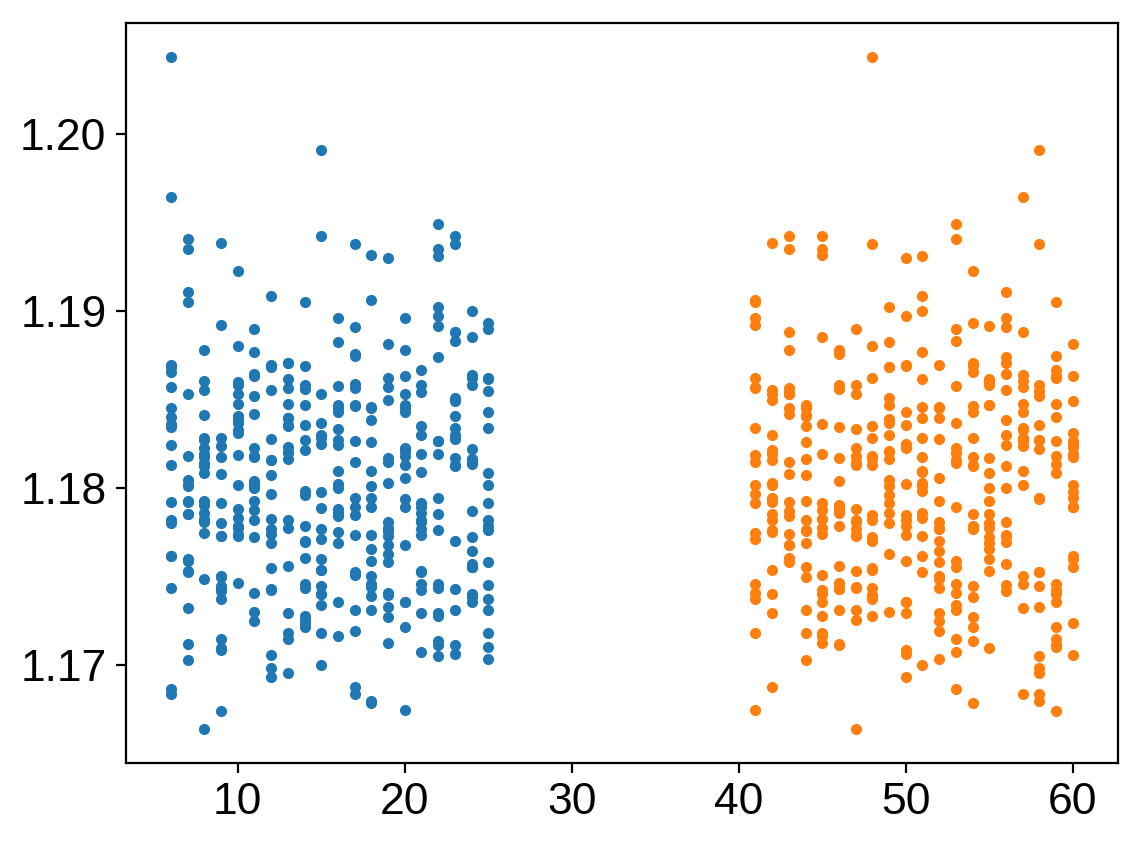

In [95]:
mesh_widths_sorted = np.argsort(mesh_widths)
mesh_heights_sorted = np.argsort(mesh_heights)
plt.plot(means_df['aper_width'], (means_df['edepth'] / uncs_df['edepth']), '.')
plt.plot(means_df['aper_height'], (means_df['edepth'] / uncs_df['edepth']),'.')

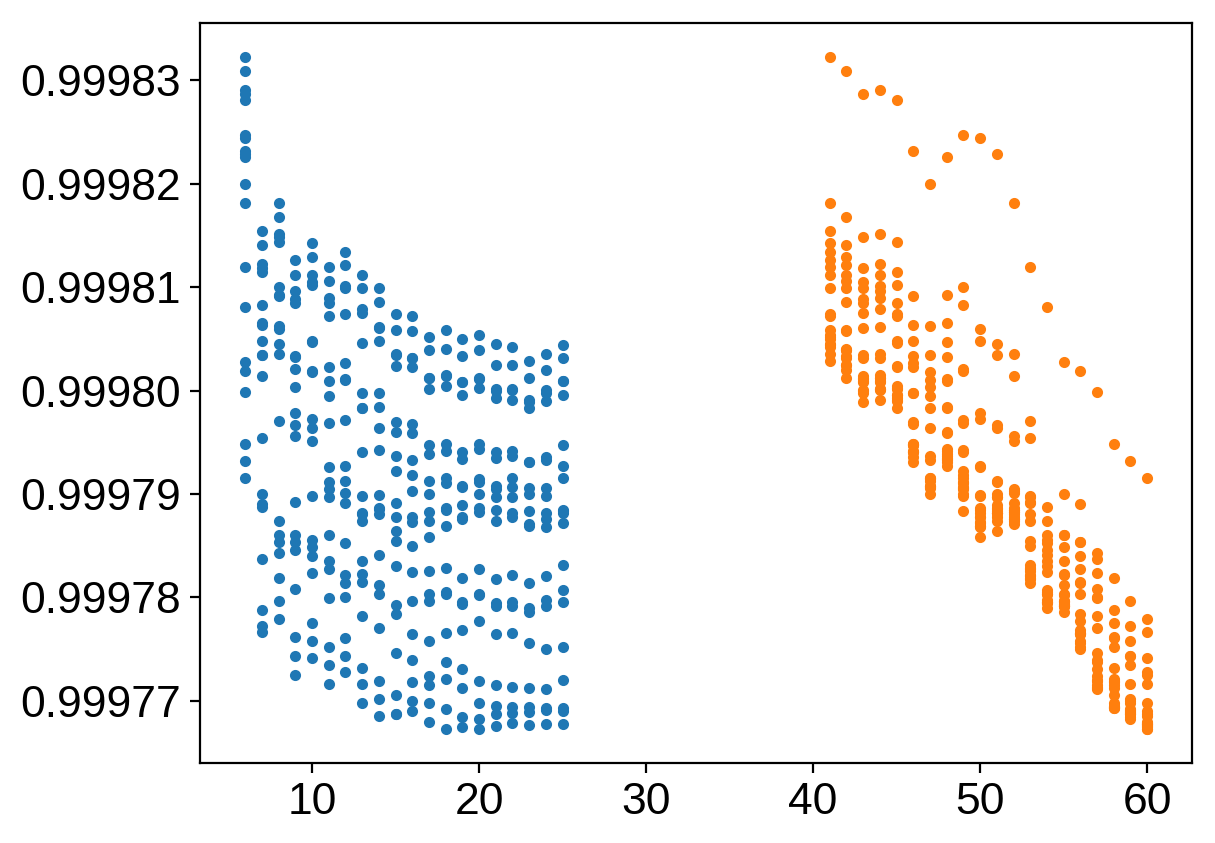

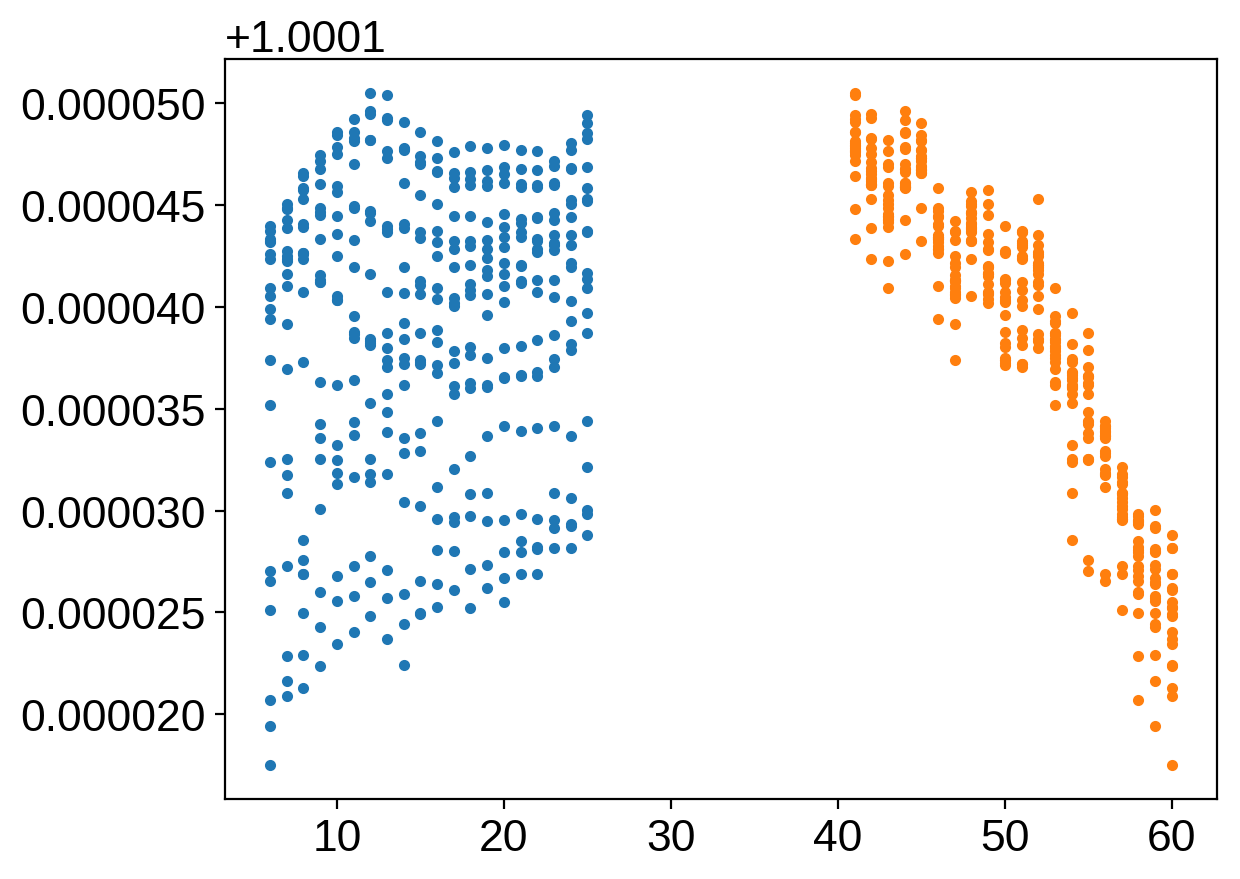

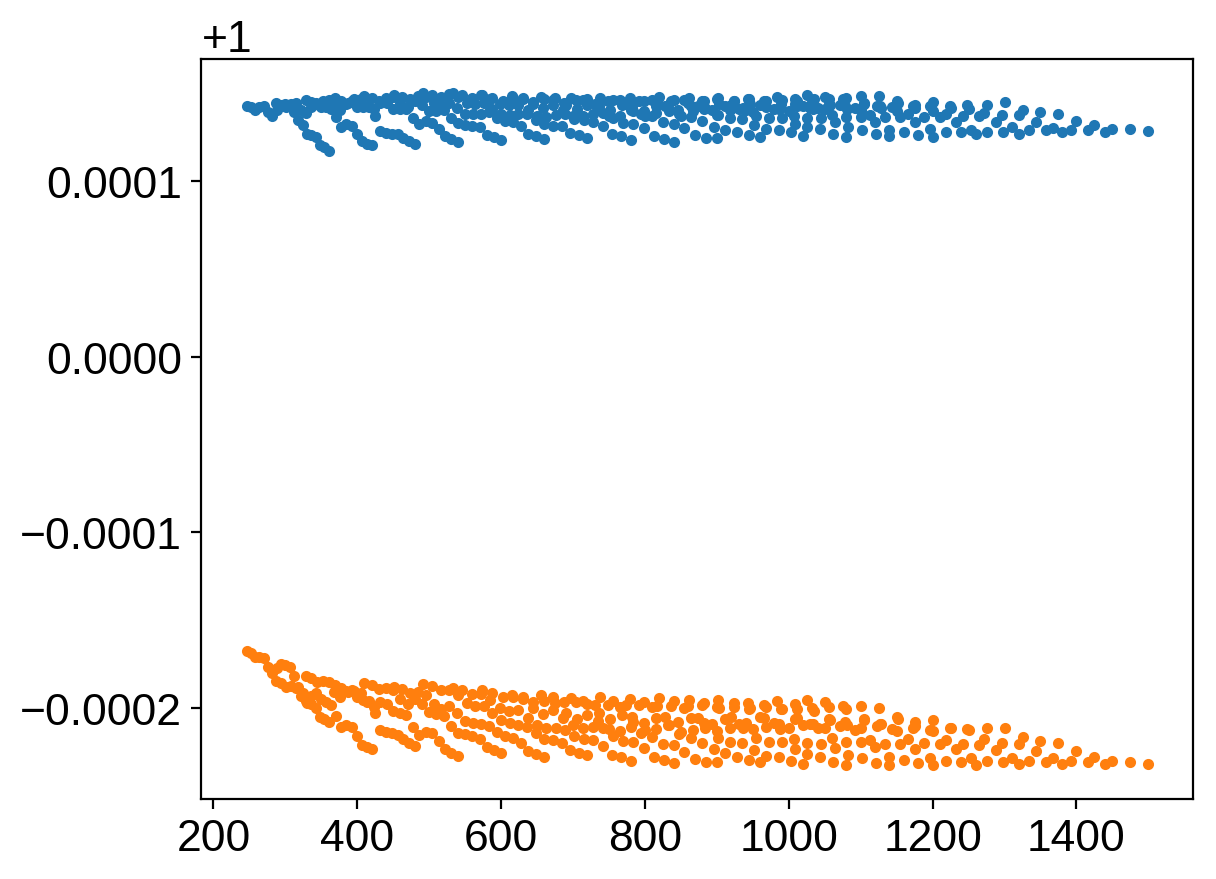

In [93]:
mesh_widths_sorted = np.argsort(mesh_widths)
mesh_heights_sorted = np.argsort(mesh_heights)

plt.figure()
plt.plot(means_df['aper_width'], means_df['mean_fwd'],'.')
plt.plot(means_df['aper_height'], means_df['mean_fwd'],'.')

plt.figure()
plt.plot(means_df['aper_width'], means_df['mean_rev'],'.')
plt.plot(means_df['aper_height'], means_df['mean_rev'],'.')

plt.figure()
plt.plot(means_df['aper_height']*means_df['aper_width'], means_df['mean_rev'],'.')
plt.plot(means_df['aper_height']*means_df['aper_width'], means_df['mean_fwd'],'.')

That looks pretty good!
Fitting this without *exoplanet* would have taken a lot more patience.

Now we can also look at the [corner plot](https://corner.readthedocs.io) of some of that parameters of interest:

In [100]:
import pygtc
import corner

In [102]:
trace = fine_grain_mcmcs_w_xcenterfit[colname]['trace']

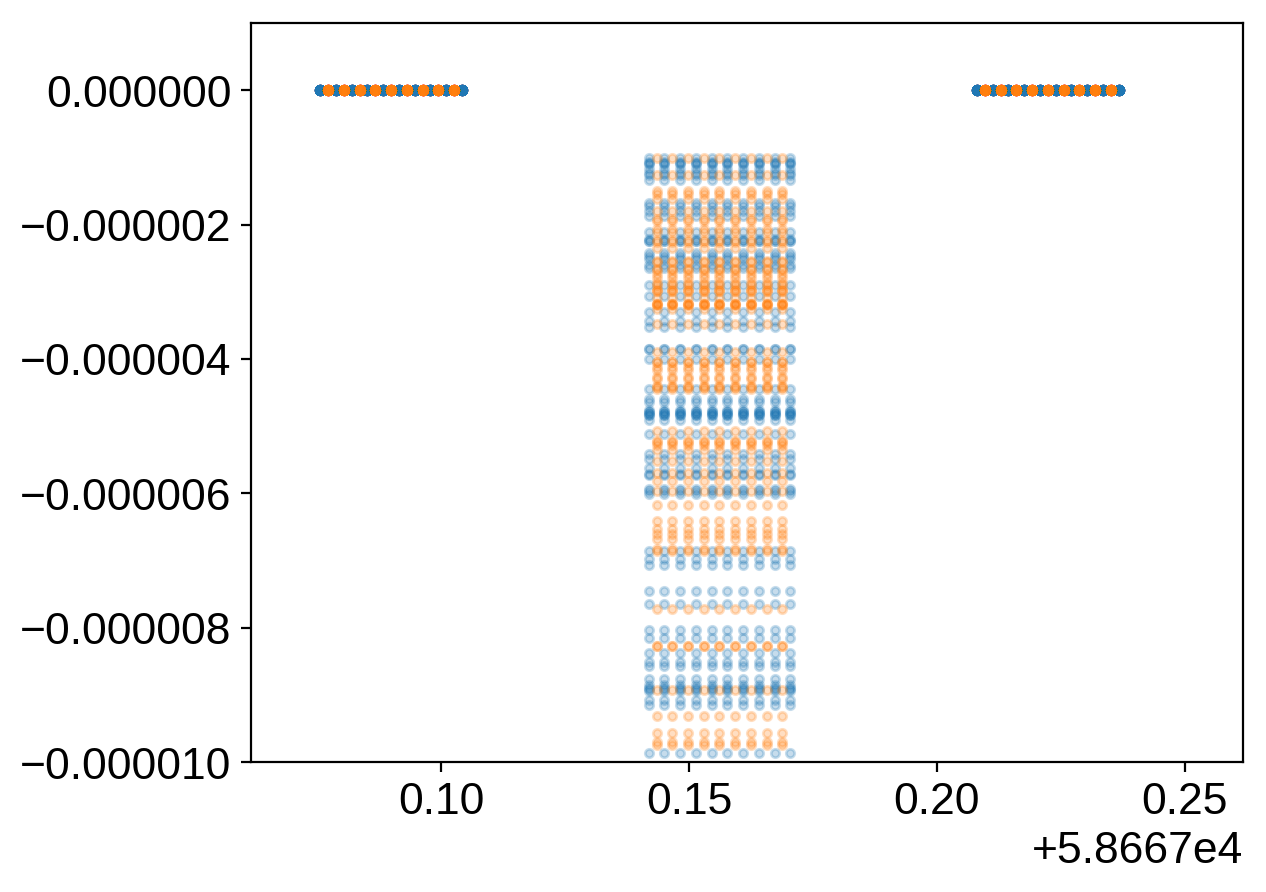

In [166]:
n_lightcurves_fwd = trace['light_curves_fwd'].shape[0]
light_curves_fwd = trace['light_curves_fwd'].reshape(trace['light_curves_fwd'].shape[:2])#trace['mean_fwd'][:,None]

n_lightcurves_rev = trace['light_curves_rev'].shape[0]
light_curves_rev = trace['light_curves_rev'].reshape(trace['light_curves_rev'].shape[:2])#trace['mean_rev'][:,None]

for k in np.random.choice(np.arange(n_lightcurves_fwd), size=100):
    plt.plot(t[idx_fwd], light_curves_fwd[k], '.', color='C0', alpha=0.25)

for k in np.random.choice(np.arange(n_lightcurves_rev), size=100):
    plt.plot(t[idx_rev], light_curves_rev[k], '.', color='C1', alpha=0.25)

plt.ylim(-1e-5, 1e-6);
plt.xlim(t0_guess - 0.1, t0_guess + 0.1);

In [ ]:
for colname in tqdm(aper_sum_columns):
    trace = fine_grain_mcmcs_w_xcenterfit[colname]['trace']
    
    samples = pm.trace_to_dataframe(trace, varnames=varnames)
    truth = [0.0, 1.0, 1.0, 0.0]
    corner.corner(samples, truths=truth, labels=varnames);

## Phase plots

Like in the radial velocity tutorial (:ref:`rv`), we can make plots of the model predictions for each planet.

In [ ]:
plt.figure()

# Get the posterior median orbital parameters
p = period
# t0 = np.median(trace["t0"])

# Plot the folded data
plt.errorbar(t[idx_fwd] - t0, data[idx_fwd], yerr=yerr[idx_fwd], fmt=".", color='C0', label="fwd data", zorder=-1000)
plt.errorbar(t[idx_rev] - t0, data[idx_rev], yerr=yerr[idx_rev], fmt=".", color='C3', label="rev data", zorder=-1000)

# Plot the folded model
preds_fwd = trace["light_curves_fwd"][:,:,0] + trace["mean_fwd"][:, None]
preds_rev = trace["light_curves_rev"][:,:,0] + trace["mean_rev"][:, None]
pred_fwd = np.median(preds_fwd, axis=0)
pred_rev = np.median(preds_rev, axis=0)


plt.plot(t[idx_fwd] - t0, pred_fwd, color="C1", label="model", zorder=10)
plt.plot(t[idx_rev] - t0, pred_rev, color="C2", label="model", zorder=10)
plt.axhline(1.0, ls='--', color='k')

# Annotate the plot with the planet's period
txt = f"Eclipse Depth = {np.mean(trace['edepth']*1e6):.0f}"
txt += f" +/- {np.std(trace['edepth']*1e6):.0f} ppm"

plt.annotate(
    txt,
    (0, 0),
    xycoords="axes fraction",
    xytext=(5, 5),
    textcoords="offset points",
    ha="left",
    va="bottom",
    fontsize=12,
)

add_traces = True
if add_traces:
    n_traces = 1000
    
    idx_rand = np.random.choice(np.arange(preds_fwd.shape[0]), size=n_traces, replace=False)
    for pred_ in preds_fwd[idx_rand]:
        plt.plot(t[idx_fwd] - t0, pred_, color="grey", alpha=0.5, zorder=0)
    
    idx_rand = np.random.choice(np.arange(preds_fwd.shape[0]), size=n_traces, replace=False)
    for pred_ in preds_rev[idx_rand]:
        plt.plot(t[idx_rev] - t0, pred_, color="grey", alpha=0.5, zorder=0)

plt.legend(fontsize=10, loc=4)
plt.xlim((t - t0).min(), (t - t0).max())
plt.xlabel("Time Since Eclipse [days]")
plt.ylabel("Relative Flux")
plt.title("WASP43 UVIS Eclipse");

## Citations

As described in the :ref:`citation` tutorial, we can use :func:`exoplanet.citations.get_citations_for_model` to construct an acknowledgement and BibTeX listing that includes the relevant citations for this model.
This is especially important here because we have used quite a few model components that should be cited.

In [ ]:
with model:
    txt, bib = xo.citations.get_citations_for_model()
print(txt)

In [ ]:
print("\n".join(bib.splitlines()[:10]) + "\n...")